# Introduction
---
Everything is categorized in thier own sections to keep the code clean and easily accessible and havent finist the any intro. This is just place holder and more will add as the time goes on


## Installation and library importing

In [1]:
pip install esy-osm-pbf


In [2]:
pip install geopy

In [3]:
pip install osmapi


In [4]:
pip install get-variable-name

In [5]:
pip install csv-diff

In [6]:
# All library addition will go here
from google.colab import drive
import os
import esy.osm.pbf
import pandas as pd
import numpy as np
import osmapi
import datetime
# from get_variable_name import get_variable_name
import matplotlib.pyplot as plt
#from csv_diff import load_csv, compare
import re
import warnings
from geopy.geocoders import Nominatim

In [7]:
warnings.filterwarnings('ignore')

## Mounting the Google Drive

In [8]:
# File import will only be allowed here for clean code
drive.mount('/content/drive')

os.chdir('/content/drive/Shareddrives/Doc_monster7/OSM files/')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Compiling CSV files for different categories
---
[OSM Tag List Wiki](https://wiki.openstreetmap.org/wiki/OSMBD_Taglist) For more info

In [9]:

def data_dump(category_name,csv_file_loc,place_holder_tag_name):
  place_holder_tag = category_name
  # place_holder_tag_name = get_variable_name(category_name)

  series_ = pd.Series(place_holder_tag)
  place_holder_tags = []
  names = []
  node_ids = []
  lonlat = []
  all_tags =[]

  for i in series_:
    try:
      all_tags.append(i.tags)

      if 'name' in i.tags and place_holder_tag_name in i.tags and i.lonlat:      
        lonlat.append(i.lonlat)
        node_ids.append(i.id)
        place_holder_tags.append(i.tags[place_holder_tag_name])
        names.append(i.tags['name']) 
      else:
        lonlat.append(i.lonlat)
        node_ids.append(i.id)
        place_holder_tags.append(i.tags[place_holder_tag_name])
        names.append(np.nan)
    
    except:
      if 'name' in i.tags and place_holder_tag_name:
        lonlat.append(np.nan)
        node_ids.append(i.id)
        place_holder_tags.append(i.tags[place_holder_tag_name])
        names.append(i.tags['name'])
      else:
        lonlat.append(np.nan)
        node_ids.append(i.id)
        place_holder_tags.append(i.tags[place_holder_tag_name])
        names.append(np.nan)
        


  df= pd.DataFrame({'name':names,place_holder_tag_name:place_holder_tags, 'longitude-lattitude': lonlat, 'All_tags': all_tags}, index = node_ids)
  print(df.shape)
  print(df.head(10))
  file_name = csv_file_loc+place_holder_tag_name+'.csv'
  # print(file_name)
  df.to_csv(file_name, index=True)

In [10]:
# Only one variable should be accessed at a time or else everything will crash. WARNING: I havent tested all variables once all testing is done it will have "# OK TESTED" infront of it
# BE AWARE it will take at least 1 hour- 1hour 30mins  for this to finish so brew a cup of coffee
osm = esy.osm.pbf.File('/content/drive/Shareddrives/Doc_monster7/OSM files/india-01-01-2021.pbf')


# Remember to add a /
csv_file_loc = '/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2021-01-01/CSV'+'/'
category = ['building','leisure','amenity']#,'office','man_made','advertising','shop','craft','historic','landuse','tourism','boundary']


for i in category:
  list_for_category =[entry for entry in osm if entry.tags.get(i)]
  data_dump(list_for_category,csv_file_loc,i)



(10012423, 4)
                                           name  ...                                           All_tags
201415532                                   NaN  ...  {'building': 'house', 'addr:street': 'Ramantha...
241856093                         Ramneek Singh  ...  {'name': 'Ramneek Singh', 'FIXME': 'name of th...
248128247                          Haydon Manor  ...  {'name': 'Haydon Manor', 'building': 'resident...
287411687  World's Highest Altitude Retail Pump  ...  {'name': 'World's Highest Altitude Retail Pump...
311477023                   Adarsh Nagar Market  ...  {'addr:city': 'JALANDHAR', 'addr:housenumber':...
316617537                                   NaN  ...  {'source': 'PerryCastañeda', 'building': 'yes'...
322858002                                   NaN  ...                                {'building': 'yes'}
330774732                     Applied Chemistry  ...  {'name': 'Applied Chemistry', 'is_in': 'IIT Ma...
330774733                     Building Sciences  .

## Additional Data from nominatim API

In [ ]:
#All functions to get details from geopy

def get_district(lonlat): #gets district
  lonlat = lonlat.split(",")
  try:
    if lonlat != np.nan:
      lat_lon = str(lonlat[1]) + "," + str(lonlat[0])
      location = geolocator.reverse(lat_lon)
      return location.raw['address']['state_district']
    else:
      return np.nan
  except:
    return np.nan

def get_state(lonlat): #gets state
  lonlat = lonlat.split(",")
  try:
    if lonlat != np.nan:
      lat_lon = str(lonlat[1]) + "," + str(lonlat[0])
      location = geolocator.reverse(lat_lon)
      return location.raw['address']['state']
    else:
      return np.nan
  except:
    return np.nan

def get_postcode(lonlat): #gets postcode
  lonlat = lonlat.split(",")
  try:
    if lonlat != np.nan:
      lat_lon = str(lonlat[1]) + "," + str(lonlat[0])
      location = geolocator.reverse(lat_lon)
      return location.raw['address']['postcode']
    else:
      return np.nan
  except:
    return np.nan

def get_places(lonlat): #gets village,suburb,city,town,county
  lonlat = lonlat.split(",")
  village,suburb,city,town,county = np.nan,np.nan,np.nan,np.nan,np.nan
  try:
    if lonlat != np.nan:
      lat_lon = str(lonlat[1]) + "," + str(lonlat[0])
      location = geolocator.reverse(lat_lon)
      address = pd.Series(location.raw['address'])

      if 'village' in address.index:
        village = address['village']
      if 'suburb' in address.index:
        suburb = address['suburb']
      if 'city' in address.index:
        city = address['city']
      if 'town' in address.index:
        town = address['town']
      if 'county' in address.index:
        county = address['county']

      return [village,suburb,city,town,county]
    else:
      return [village,suburb,city,town,county]
  except:
    return [village,suburb,city,town,county]

In [ ]:
#Gets all details-- village,suburb,city,town,county,postcode,district,state

#for 1 csv file

geolocator = Nominatim(user_agent="geoapiExercises")
csv_file = '/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-27/CSV/amenity.csv'

df = pd.read_csv(csv_file)
df['Village'],df['County'],df['Suburb'],df['Town']='','','',''
df['City'],df['PostCode'],df['District'],df['State'] = '','','',''

for j in range(len(df['longitude-lattitude'])):
  places = get_places(str(df['longitude-lattitude'][j]).strip("()"))
  df['Village'][j] = places[0]
  df['Suburb'][j] = places[1]
  df['City'][j] = places[2]
  df['Town'][j] = places[3]
  df['County'][j] = places[4]

  df['PostCode'][j] = get_postcode(str(df['longitude-lattitude'][j]).strip("()"))
  df['District'][j] = get_district(str(df['longitude-lattitude'][j]).strip("()"))
  df['State'][j] = get_state(str(df['longitude-lattitude'][j]).strip("()"))
  

df.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True) 
df.to_csv('/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-27/CSV Modified/amenity.csv', index=False)
df.head()

In [ ]:
# 
# Gets all details-- village,suburb,city,town,county,postcode,district,state
# 
# for all csv files within a folder (haven't run this)
# 
files = ['building','leisure','amenity','office','man_made','advertising','shop','craft','historic','landuse','tourism','boundary'] # 'building' is left
geolocator = Nominatim(user_agent="geoapiExercises")

for i in files:
  csv_file = '/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2014-01-01/CSV/'+ i +'.csv'

  df = pd.read_csv(csv_file)
  df['Village'],df['County'],df['Suburb'],df['Town']='','','',''
  df['City'],df['PostCode'],df['District'],df['State'] = '','','',''

  for j in range(len(df['longitude-lattitude'])):
    places = get_places(str(df['longitude-lattitude'][j]).strip("()"))
    df['Village'][j] = places[0]
    df['Suburb'][j] = places[1]
    df['City'][j] = places[2]
    df['Town'][j] = places[3]
    df['County'][j] = places[4]

    df['PostCode'][j] = get_postcode(str(df['longitude-lattitude'][j]).strip("()"))
    df['District'][j] = get_district(str(df['longitude-lattitude'][j]).strip("()"))
    df['State'][j] = get_state(str(df['longitude-lattitude'][j]).strip("()"))
    
  df.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)
  df.to_csv('/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2014-01-01/CSV Modified/'+ i +'.csv', index=False)
  print(df.head())

# Graph generation From CSV FILE

---
This section is only for generating result sets from csv files

* list different category
* generate graphs comparing it with other categories

In [ ]:
building_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/CSV/Wed Dec 23 06:46:24 2020_building_dump.csv'
leisure_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/CSV/Wed Dec 23 06:51:58 2020_leisure_dump.csv'
amenity_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/CSV/Wed Dec 23 06:57:16 2020_amenity_dump.csv'
office_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/CSV/Wed Dec 23 07:02:35 2020_office_dump.csv'
man_made_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/CSV/Wed Dec 23 07:07:55 2020_man_made_dump.csv'
advertising_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/CSV/Wed Dec 23 07:13:18 2020_advertising_dump.csv'
shop_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/CSV/Wed Dec 23 07:18:37 2020_shop_dump.csv'
craft_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/CSV/Wed Dec 23 07:23:54 2020_craft_dump.csv'
historic_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/CSV/Wed Dec 23 07:29:15 2020_historic_dump.csv'
landuse_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/CSV/Wed Dec 23 07:34:41 2020_landuse_dump.csv'
tourism_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/CSV/Wed Dec 23 07:40:03 2020_tourism_dump.csv'
boundary_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/CSV/Wed Dec 23 07:45:24 2020_boundary_dump.csv'

# add / at the end
graphs_loc ='/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/2020-12-22/Data Graphs CSV'+'/'


# os.chdir('/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/')

## Category Vise Graph Generation
---
ATTENTION : Remember to give the path above for this to work or else it will give an error

### Building graph

In [ ]:
ad = pd.read_csv(building_loc)
loc = graphs_loc+'building-scatter.jpg'

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)

In [ ]:
ad.tail(20)

,Node id,name,building,longitude-lattitude
9994869,12077348,NaN,yes,NaN
9994870,12077353,NaN,yes,NaN
9994871,12077470,NaN,yes,NaN
9994872,12077471,NaN,yes,NaN
9994873,12077472,NaN,yes,NaN
9994874,12077473,NaN,yes,NaN
9994875,12077474,NaN,yes,NaN
9994876,12077475,NaN,yes,NaN
9994877,12077476,NaN,yes,NaN
9994878,12077477,NaN,yes,NaN


In [ ]:
categories = ad['building'].value_counts().sort_values()
categories

godown               1
200113               1
197238               1
199660               1
res                  1
                ...   
school           27965
apartments       30612
residential      43065
house           224745
yes            9622028
Name: building, Length: 1411, dtype: int64

In [ ]:
upper = [i for i in categories.values if i > categories.values.mean()]
upper_index = [categories.index[i] for i in range(len(categories)) if categories[i] > categories.values.mean()]
categories_upper =  pd.Series(upper,index=upper_index)
categories_upper

commercial        9631
school           27965
apartments       30612
residential      43065
house           224745
yes            9622028
dtype: int64

No handles with labels found to put in legend.


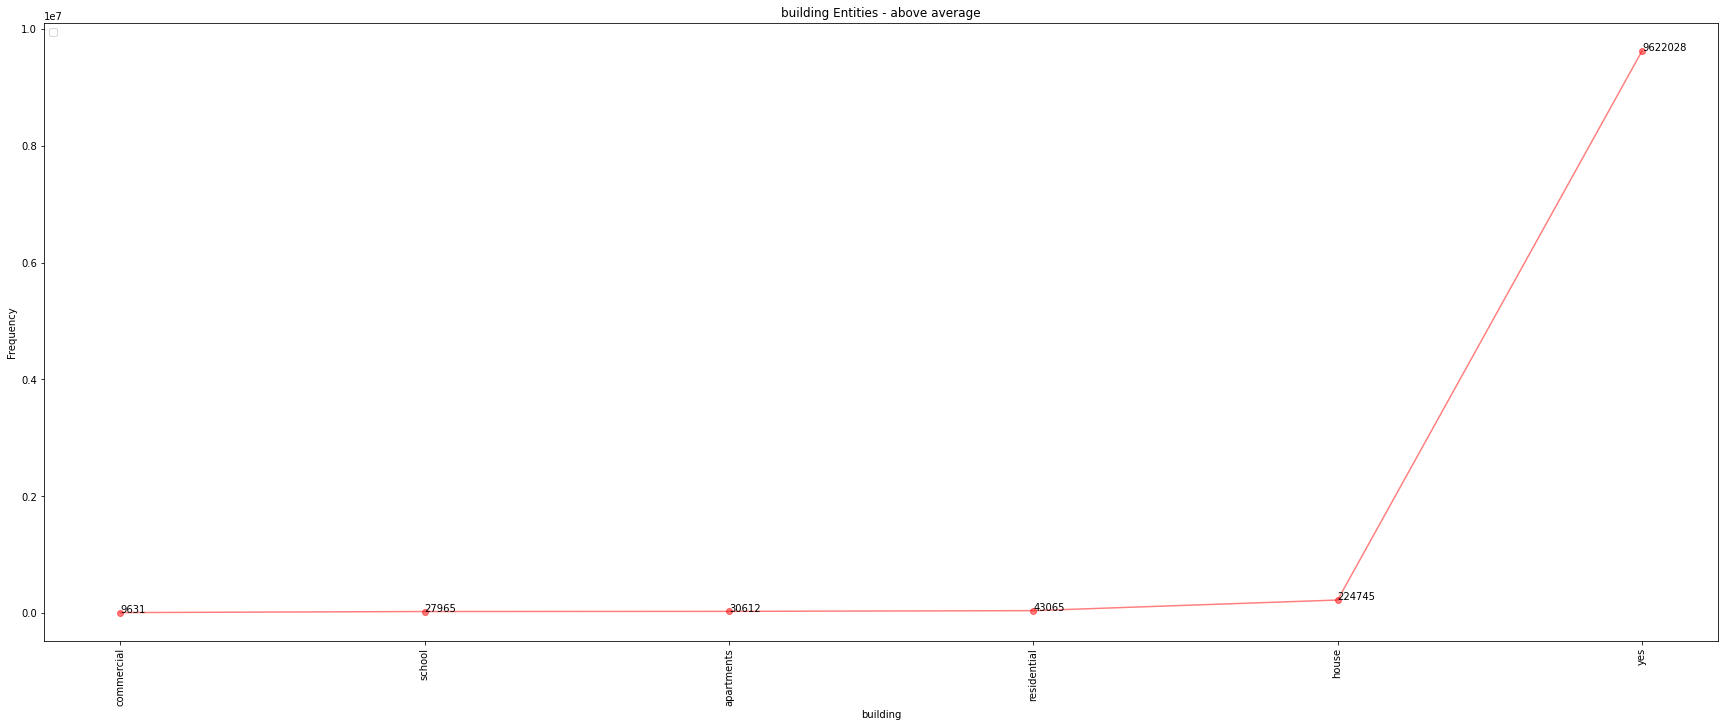

In [ ]:
fig = plt.figure(figsize = (30,25))
C = np.array([255, 0, 0])

ax2 = fig.add_subplot(211)
x = categories_upper.index
y = categories_upper.values
ax2.plot(x,y, marker='o', linestyle='-',  c = 'r', label='',alpha=0.5) 
ax2.set_xlabel('building')
ax2.set_ylabel('Frequency') 
plt.xticks(rotation=90)
ax2.set_title('building Entities - above average')
ax2.legend(loc = "upper left") 

for a,b in zip(x, y): 
    plt.text(a, b, str(b))

plt.savefig(loc,bbox_inches='tight', dpi=300)
plt.show()

### Advertising graph

In [ ]:
ad = pd.read_csv(advertising_loc)
loc = graphs_loc+'advertising-scatter.jpg'

In [ ]:
advertising_list = ad['advertising'].value_counts()
advertising_list

billboard    22
board         2
column        2
grane         1
totem         1
screen        1
Name: advertising, dtype: int64

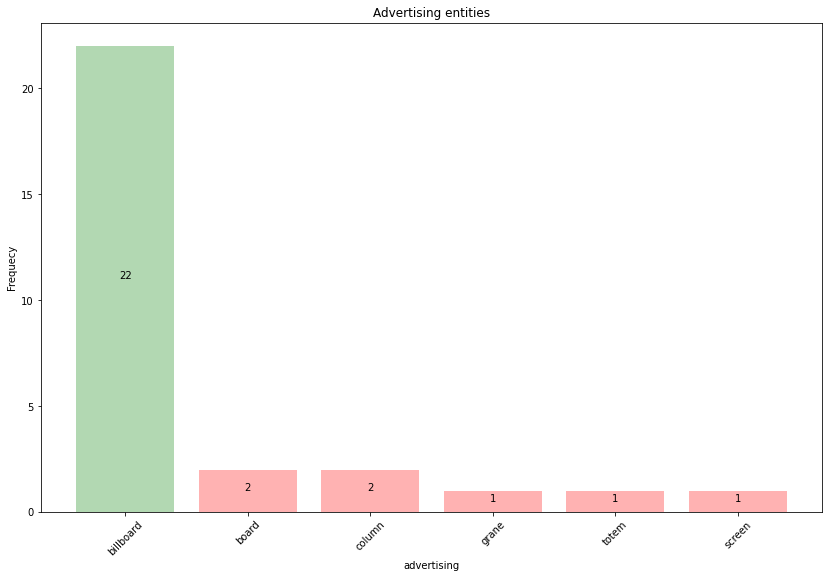

In [ ]:
fig = plt.figure(figsize = (14, 9))
ax1 = fig.add_subplot()

x_1 = advertising_list.index
y_1 = advertising_list.values

for x_, y_ in zip(x_1, y_1):
    ax1.bar(x_, y_, color = "red" if y_ < y_1.mean() else "green", alpha = 0.3)
    ax1.text(x_, y_ - y_/2, str(y_), horizontalalignment = 'center')

plt.xticks(rotation=45)
ax1.set_xlabel('advertising')
ax1.set_ylabel('Frequecy')
ax1.set_title("Advertising entities")
plt.savefig(loc,bbox_inches='tight', dpi=300)
plt.show()

### Leisure graph

In [ ]:
ad = pd.read_csv(leisure_loc)
loc = graphs_loc+'leisure-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)

In [ ]:
ad.tail(10)

,Node id,name,leisure,longitude-lattitude
43545,11685785,NaN,track,NaN
43546,11705075,NaN,track,NaN
43547,11739797,Trikon park,park,NaN
43548,11760856,NaN,track,NaN
43549,11769748,Kasu Brahmananda Reddy National Park,nature_reserve,NaN
43550,12015991,NaN,track,NaN
43551,12015992,NaN,track,NaN
43552,12017087,NaN,track,NaN
43553,12017705,NaN,track,NaN
43554,12030651,Begumpet Hockey Astroturf Stadium,stadium,NaN


In [ ]:
categories = ad['leisure'].value_counts().sort_values()
categories

aquarium                  1
car_wash                  1
leisure                   1
Park                      1
garden; playground        1
                      ...  
swimming_pool          1732
garden                 2567
playground             3887
pitch                  6337
park                  22263
Name: leisure, Length: 77, dtype: int64

In [ ]:
lower = [i for i in categories.values if i < categories.values.mean()]
lower_index = [categories.index[i] for i in range(len(categories)) if categories[i] < categories.values.mean()]
categories_lower =  pd.Series(lower,index=lower_index)
len(categories_lower)
#categories_lower

67

In [ ]:

upper = [i for i in categories.values if i > categories.values.mean()]
upper_index = [categories.index[i] for i in range(len(categories)) if categories[i] > categories.values.mean()]
categories_upper =  pd.Series(upper,index=upper_index)
categories_upper

nature_reserve      665
fitness_centre      741
resort              742
stadium            1125
sports_centre      1242
swimming_pool      1732
garden             2567
playground         3887
pitch              6337
park              22263
dtype: int64

No handles with labels found to put in legend.
No handles with labels found to put in legend.


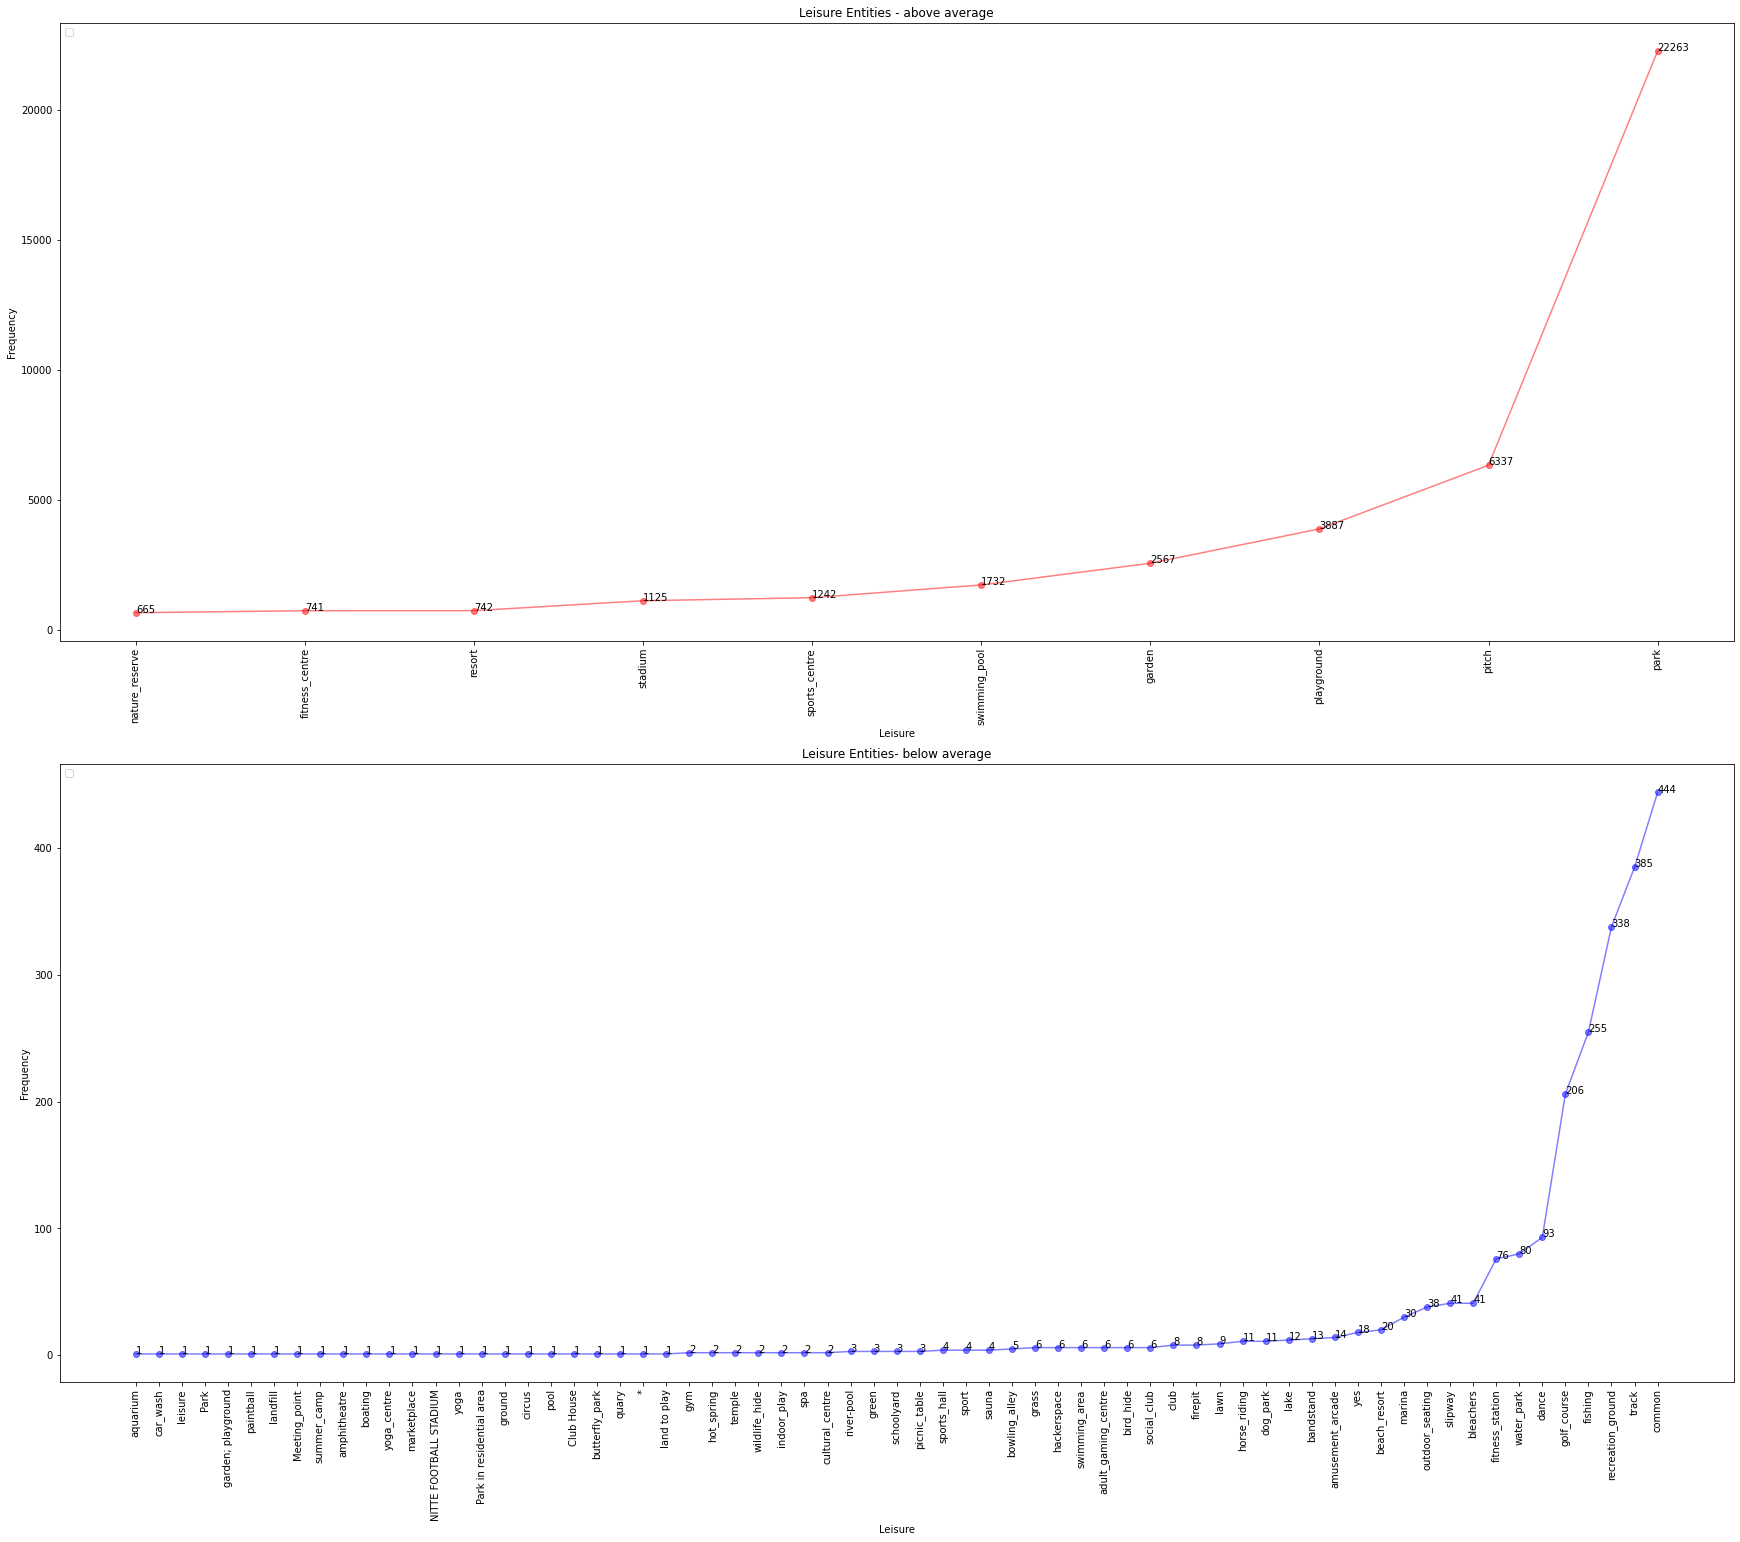

In [ ]:
fig = plt.figure(figsize = (30,25))
C = np.array([255, 0, 0])

ax2 = fig.add_subplot(211)
x = categories_upper.index
y = categories_upper.values
ax2.plot(x,y, marker='o', linestyle='-',  c = 'r', label='',alpha=0.5) 
ax2.set_xlabel('Leisure')
ax2.set_ylabel('Frequency') 
plt.xticks(rotation=90)
ax2.set_title('Leisure Entities - above average')
ax2.legend(loc = "upper left") 

for a,b in zip(x, y): 
    plt.text(a, b, str(b))

ax3 = fig.add_subplot(212)
x2 = categories_lower.index
y2 = categories_lower.values
ax3.plot(x2,y2, marker='o', linestyle='-',  c = 'b', label='',alpha=0.5) 
ax3.set_xlabel('Leisure')
ax3.set_ylabel('Frequency') 
plt.xticks(rotation=90)
ax3.set_title('Leisure Entities- below average')
ax3.legend(loc = "upper left") 

for a,b in zip(x2, y2): 
    plt.text(a, b, str(b))

plt.savefig(loc,bbox_inches='tight', dpi=300)
plt.show()

### Amenity graph


In [ ]:
ad = pd.read_csv(amenity_loc)
loc = graphs_loc+'amenity-scatter.jpg'

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,amenity,longitude-lattitude
310757,11965593,Tata Institute of Fundamental Research (TIFR),college,NaN
310758,11965602,School of Life Sciences,college,NaN
310759,11984411,Kendriya Vidyalayam,school,NaN
310760,11997515,NaN,parking,NaN
310761,12016003,Akshaya e Kendra Vayalar,internet_cafe,NaN
310762,12022647,Sree Raja Rajeswari English Medium Schoolv Ground,school,NaN
310763,12022649,Higher Secondary School Kandamangalam,school,NaN
310764,12022780,NaN,parking,NaN
310765,12031603,LLRM Medical College,college,NaN
310766,12047020,NaN,bus_station,NaN


In [ ]:
categories = ad['amenity'].value_counts().sort_values()


In [ ]:
lower = [i for i in categories.values if i < categories.values.mean()]
lower_index = [categories.index[i] for i in range(len(categories)) if categories[i] < categories.values.mean()]
categories_lower =  pd.Series(lower,index=lower_index)
len(categories_lower)

416

In [ ]:
upper = [i for i in categories.values if i > categories.values.mean()]
upper_index = [categories.index[i] for i in range(len(categories)) if categories[i] > categories.values.mean()]
categories_upper =  pd.Series(upper,index=upper_index)
len(categories_upper)

34

No handles with labels found to put in legend.


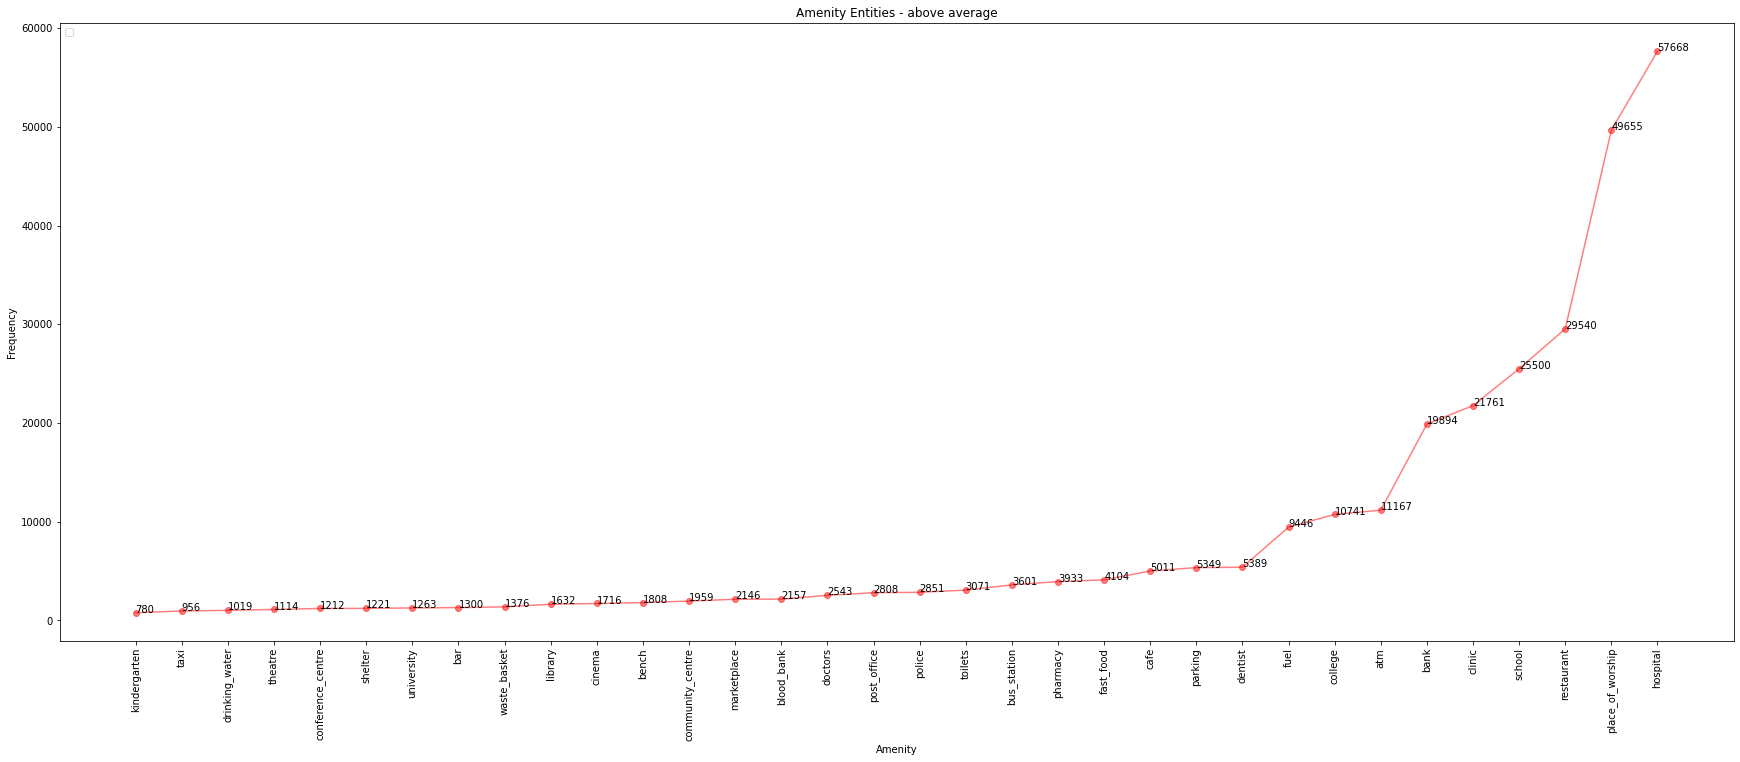

In [ ]:
fig = plt.figure(figsize = (30,25))
C = np.array([255, 0, 0])

ax2 = fig.add_subplot(211)
x = categories_upper.index
y = categories_upper.values
ax2.plot(x,y, marker='o', linestyle='-',  c = 'r', label='',alpha=0.5) 
ax2.set_xlabel('Amenity')
ax2.set_ylabel('Frequency') 
plt.xticks(rotation=90)
ax2.set_title('Amenity Entities - above average')
ax2.legend(loc = "upper left") 

for a,b in zip(x, y): 
    plt.text(a, b, str(b))

plt.savefig(loc,bbox_inches='tight', dpi=300)
plt.show()

### Office graph

In [ ]:
ad = pd.read_csv(office_loc)
loc = graphs_loc+'office-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,office,longitude-lattitude
17357,10601361,Brilliant Study Centre A-Block,educational_institution,NaN
17358,11072472,NaN,educational_institution,NaN
17359,11084375,infopark cherthala,it,NaN
17360,11146411,Institute of Management in Government,government,NaN
17361,11277763,gecw,yes,NaN
17362,11739992,Physics Department,educational_institution,NaN
17363,11774594,GITAM Institute of Management,educational_institution,NaN
17364,11795466,"O/o CE and ED, Palakkad Project Zone, CPWD",government,NaN
17365,11965593,Tata Institute of Fundamental Research (TIFR),research,NaN
17366,12022648,Sree Raja Rajeswari English Medium School Buil...,educational_institution,NaN


In [ ]:
categories = ad['office'].value_counts().sort_values()


No handles with labels found to put in legend.


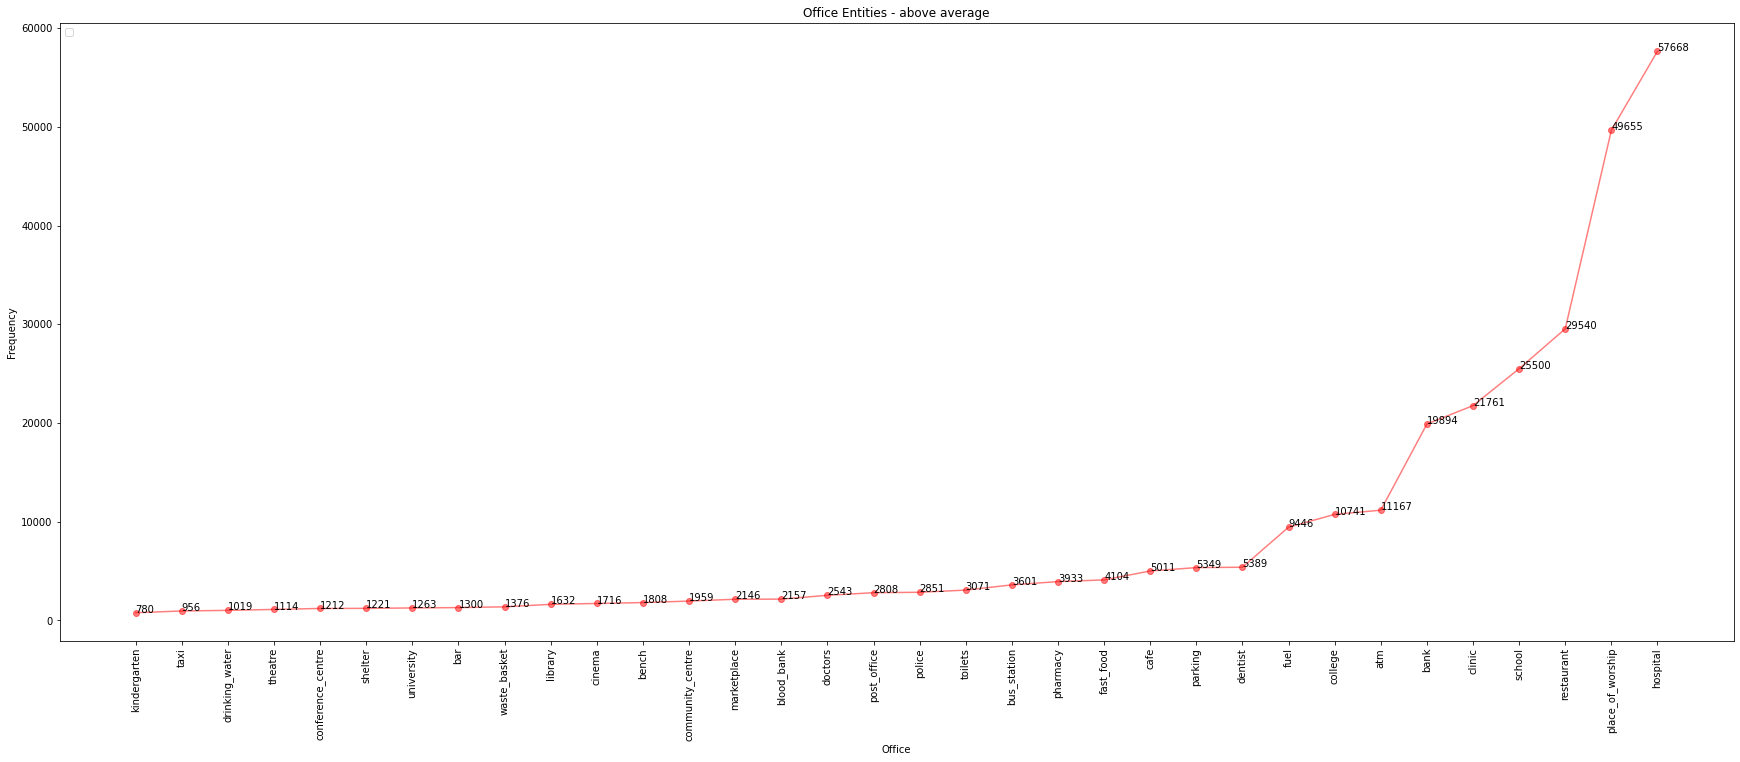

In [ ]:
fig = plt.figure(figsize = (30,25))
C = np.array([255, 0, 0])

ax2 = fig.add_subplot(211)
x = categories_upper.index
y = categories_upper.values
ax2.plot(x,y, marker='o', linestyle='-',  c = 'r', label='',alpha=0.5) 
ax2.set_xlabel('Office')
ax2.set_ylabel('Frequency') 
plt.xticks(rotation=90)
ax2.set_title('Office Entities - above average')
ax2.legend(loc = "upper left") 

for a,b in zip(x, y): 
    plt.text(a, b, str(b))

plt.savefig(loc,bbox_inches='tight', dpi=300)
plt.show()

### Man Made graph

In [ ]:
ad = pd.read_csv(man_made_loc)
loc = graphs_loc+'man_made-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,man_made,longitude-lattitude
42866,11081816,NaN,works,NaN
42867,11082137,NaN,works,NaN
42868,11109689,NaN,works,NaN
42869,11343028,NaN,courtyard,NaN
42870,11606008,NaN,pier,NaN
42871,11750925,NaN,courtyard,NaN
42872,11750926,NaN,courtyard,NaN
42873,11751104,NaN,courtyard,NaN
42874,11918823,NaN,pier,NaN
42875,11965361,Ram Jhula Bridge,bridge,NaN


In [ ]:
categories = ad['man_made'].value_counts().sort_values()
categories

Ashram Dining Hall        1
conveyor_belt             1
Market                    1
satellite_dish            1
water_treatment           1
                      ...  
tower                  3025
works                  3034
storage_tank           3990
water_tower            5692
water_well            15393
Name: man_made, Length: 137, dtype: int64

In [ ]:
upper = [i for i in categories.values if i > categories.values.mean()]
upper_index = [categories.index[i] for i in range(len(categories)) if categories[i] > categories.values.mean()]
categories_upper =  pd.Series(upper,index=upper_index)
len(categories_upper)

15

No handles with labels found to put in legend.


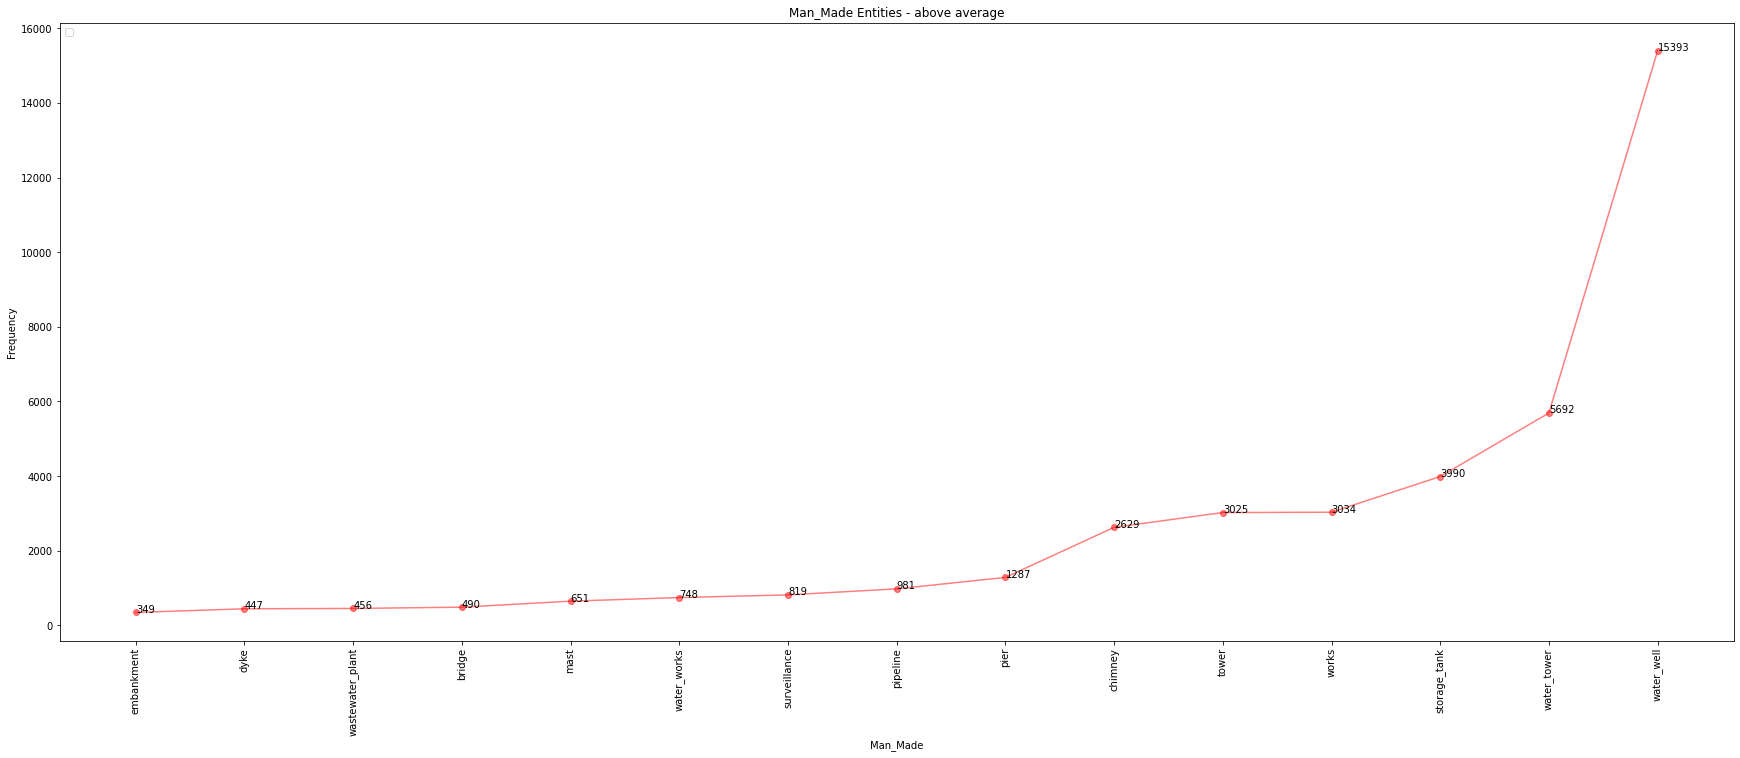

In [ ]:
fig = plt.figure(figsize = (30,25))
C = np.array([255, 0, 0])

ax2 = fig.add_subplot(211)
x = categories_upper.index
y = categories_upper.values
ax2.plot(x,y, marker='o', linestyle='-',  c = 'r', label='',alpha=0.5) 
ax2.set_xlabel('Man_Made')
ax2.set_ylabel('Frequency') 
plt.xticks(rotation=90)
ax2.set_title('Man_Made Entities - above average')
ax2.legend(loc = "upper left") 

for a,b in zip(x, y): 
    plt.text(a, b, str(b))

plt.savefig(loc,bbox_inches='tight', dpi=300)
plt.show()

### Shop graph

In [ ]:
ad = pd.read_csv(shop_loc)
loc = graphs_loc+'shop-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,shop,longitude-lattitude
66776,7045338,Mulki Fish Market,seafood,NaN
66777,7547600,Chittilappilly Medical Store,medical_supply,NaN
66778,8726210,Downtown Mall,mall,NaN
66779,9636042,VR Bengaluru,mall,NaN
66780,10284079,Kohima Super Market,mall,NaN
66781,11071893,C.N store,plumbing,NaN
66782,11083764,Family Supermarket,supermarket,NaN
66783,11083765,NaN,supermarket,NaN
66784,11085987,Delma Centre,supermarket,NaN
66785,11109657,TC Silks,clothes,NaN


In [ ]:
categories = ad['shop'].value_counts().sort_values()
categories

beauty_parlour                1
viewpoint                     1
souvenirs                     1
Kitchen_stoves_and_hobs       1
civil_supply_store            1
                           ... 
convenience                2775
supermarket                5185
bakery                     5221
clothes                    5425
yes                        9610
Name: shop, Length: 596, dtype: int64

In [ ]:
upper = [i for i in categories.values if i > categories.values.mean()]
upper_index = [categories.index[i] for i in range(len(categories)) if categories[i] > categories.values.mean()]
categories_upper =  pd.Series(upper,index=upper_index)
len(categories_upper)

70

No handles with labels found to put in legend.


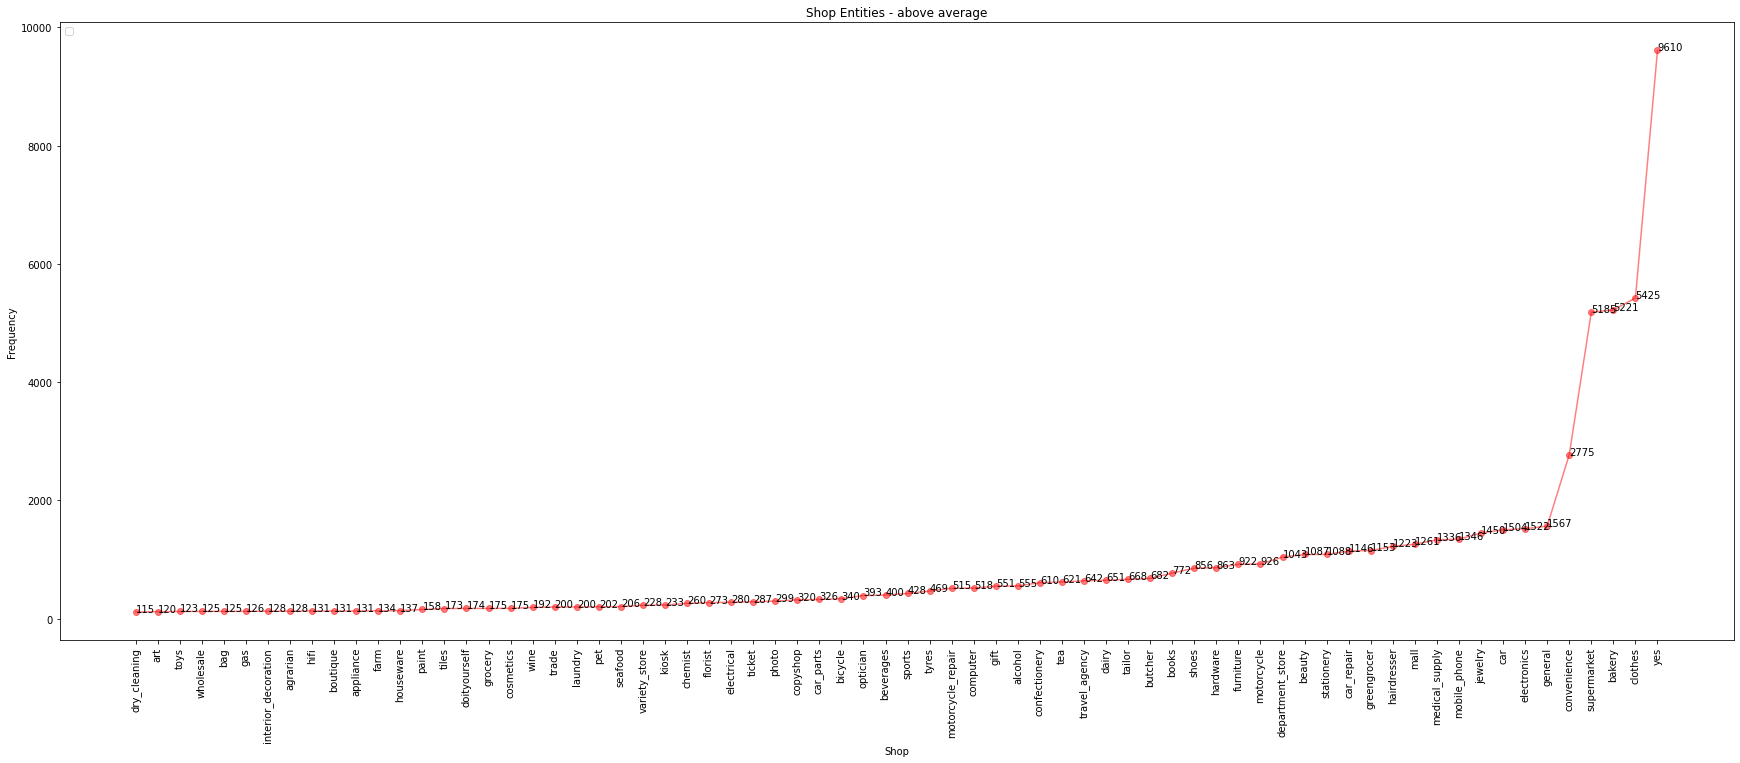

In [ ]:
fig = plt.figure(figsize = (30,25))
C = np.array([255, 0, 0])

ax2 = fig.add_subplot(211)
x = categories_upper.index
y = categories_upper.values
ax2.plot(x,y, marker='o', linestyle='-',  c = 'r', label='',alpha=0.5) 
ax2.set_xlabel('Shop')
ax2.set_ylabel('Frequency') 
plt.xticks(rotation=90)
ax2.set_title('Shop Entities - above average')
ax2.legend(loc = "upper left") 

for a,b in zip(x, y): 
    plt.text(a, b, str(b))

plt.savefig(loc,bbox_inches='tight', dpi=300)
plt.show()

### Craft graph

In [ ]:
ad = pd.read_csv(craft_loc)
loc = graphs_loc+'craft-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,craft,longitude-lattitude
1922,879560489,NST Garage,hvac,NaN
1923,880099941,NaN,sawmill,NaN
1924,881043999,NaN,sawmill,NaN
1925,881493914,NaN,caterer,NaN
1926,882220152,"KMP Saw Mill, Muvattupuzha",sawmill,NaN
1927,882221189,NaN,sawmill,NaN
1928,882223467,Cherkottu Saw Mill,sawmill,NaN
1929,882358977,NaN,pottery,NaN
1930,884053814,Three Star Sawmill,sawmill,NaN
1931,884258734,Flour Mill,grinding_mill,NaN


In [ ]:
categories = ad['craft'].value_counts().sort_values()
categories

electrician;electronics_repair      1
plasterer                           1
rigger                              1
goldsmith                           1
saddler                             1
                                 ... 
photographer                      139
carpenter                         139
electronics_repair                180
sawmill                           200
tailor                            212
Name: craft, Length: 80, dtype: int64

In [ ]:
upper = [i for i in categories.values if i > categories.values.mean()]
upper_index = [categories.index[i] for i in range(len(categories)) if categories[i] > categories.values.mean()]
categories_upper =  pd.Series(upper,index=upper_index)
len(categories_upper)

15

No handles with labels found to put in legend.


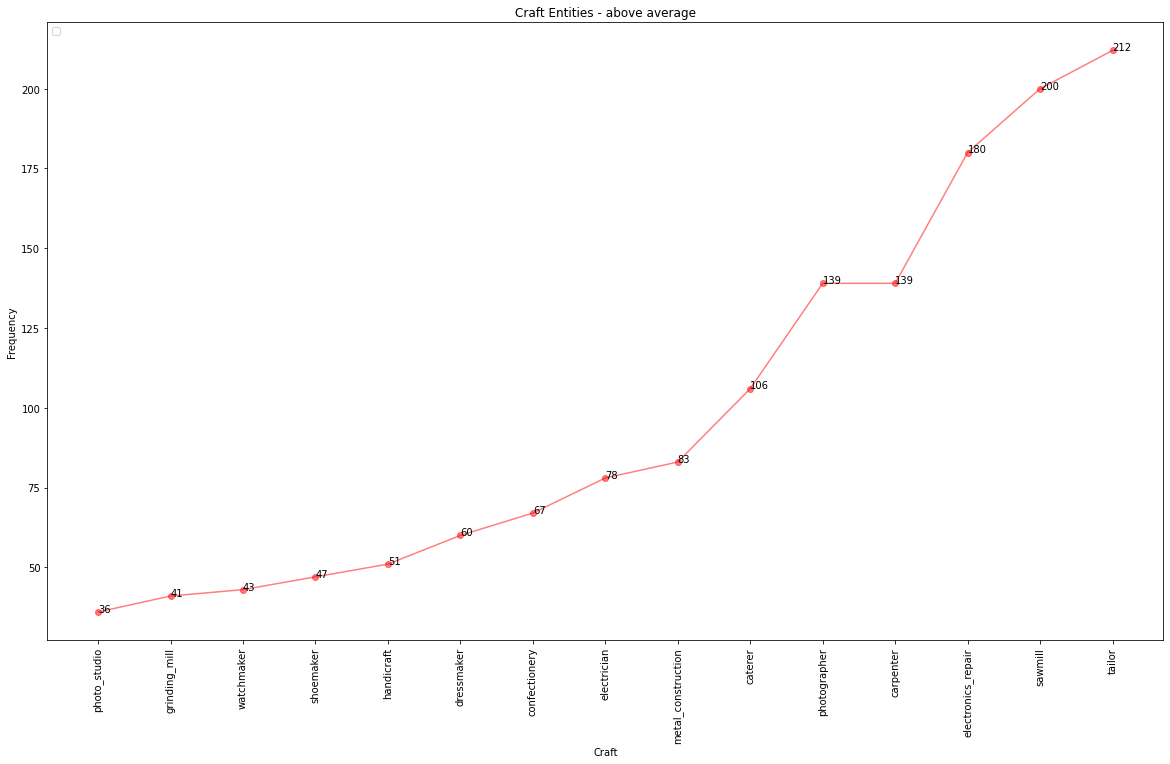

In [ ]:
fig = plt.figure(figsize = (20,25))
C = np.array([255, 0, 0])

ax2 = fig.add_subplot(211)
x = categories_upper.index
y = categories_upper.values
ax2.plot(x,y, marker='o', linestyle='-',  c = 'r', label='',alpha=0.5) 
ax2.set_xlabel('Craft')
ax2.set_ylabel('Frequency') 
plt.xticks(rotation=90)
ax2.set_title('Craft Entities - above average')
ax2.legend(loc = "upper left") 

for a,b in zip(x, y): 
    plt.text(a, b, str(b))

plt.savefig(loc,bbox_inches='tight', dpi=300)
plt.show()

### Historic graph

In [ ]:
ad = pd.read_csv(historic_loc)
loc = graphs_loc+'historic-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,historic,longitude-lattitude
5053,9976225,Lukshmi Villas Palace,castle,NaN
5054,10308869,Sisupalgarh Fort,fort,NaN
5055,10567786,Lohgad Fort,ruins,NaN
5056,10885025,Mandawa Castle,castle,NaN
5057,10910640,NaN,castle,NaN
5058,10928571,NaN,monument,NaN
5059,10928587,NaN,yes,NaN
5060,11300591,Kishangarh Fort,castle,NaN
5061,11337533,Gurramkonda Fort,fort,NaN
5062,11739451,Jain Temple,archaeological_site,NaN


In [ ]:
categories = ad['historic'].value_counts().sort_values()
categories

service                 1
tree                    1
water_well              1
Shiv Mandir Temple      1
cemetery                1
                     ... 
building              501
ruins                 555
castle                604
memorial              654
monument              960
Name: historic, Length: 71, dtype: int64

In [ ]:
upper = [i for i in categories.values if i > categories.values.mean()]
upper_index = [categories.index[i] for i in range(len(categories)) if categories[i] > categories.values.mean()]
categories_upper =  pd.Series(upper,index=upper_index)
len(categories_upper)

12

No handles with labels found to put in legend.


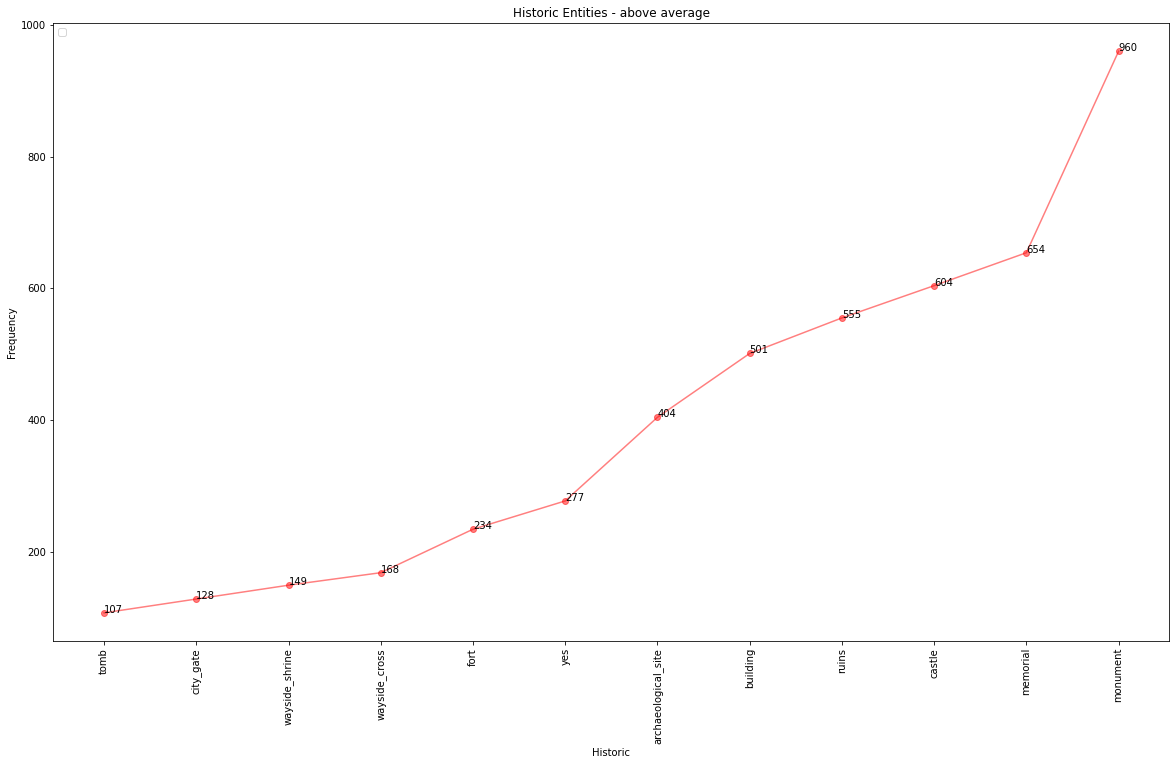

In [ ]:
fig = plt.figure(figsize = (20,25))
C = np.array([255, 0, 0])

ax2 = fig.add_subplot(211)
x = categories_upper.index
y = categories_upper.values
ax2.plot(x,y, marker='o', linestyle='-',  c = 'r', label='',alpha=0.5) 
ax2.set_xlabel('Historic')
ax2.set_ylabel('Frequency') 
plt.xticks(rotation=90)
ax2.set_title('Historic Entities - above average')
ax2.legend(loc = "upper left") 

for a,b in zip(x, y): 
    plt.text(a, b, str(b))

plt.savefig(loc,bbox_inches='tight', dpi=300)
plt.show()

### Landuse graph

In [ ]:
ad = pd.read_csv(landuse_loc)
loc = graphs_loc+'landuse-scatter.jpg'

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,landuse,longitude-lattitude
304664,11965476,Food Corporation Of India,industrial,NaN
304665,11968939,NaN,farmland,NaN
304666,11977663,NaN,residential,NaN
304667,11977664,NaN,residential,NaN
304668,11977750,NaN,residential,NaN
304669,11977992,NaN,residential,NaN
304670,12013427,NaN,residential,NaN
304671,12017088,NaN,village_green,NaN
304672,12045851,NaN,residential,NaN
304673,12045852,NaN,farmland,NaN


In [ ]:
categories = ad['landuse'].value_counts().sort_values()
categories

Mela Ground                1
purpose                    1
Godowns                    1
public semi public         1
Monument                   1
                       ...  
forest                  6410
reservoir              10707
industrial             12773
farmland               50900
residential           182707
Name: landuse, Length: 161, dtype: int64

In [ ]:
upper = [i for i in categories.values if i > categories.values.mean()]
upper_index = [categories.index[i] for i in range(len(categories)) if categories[i] > categories.values.mean()]
categories_upper =  pd.Series(upper,index=upper_index)
len(categories_upper)

12

No handles with labels found to put in legend.


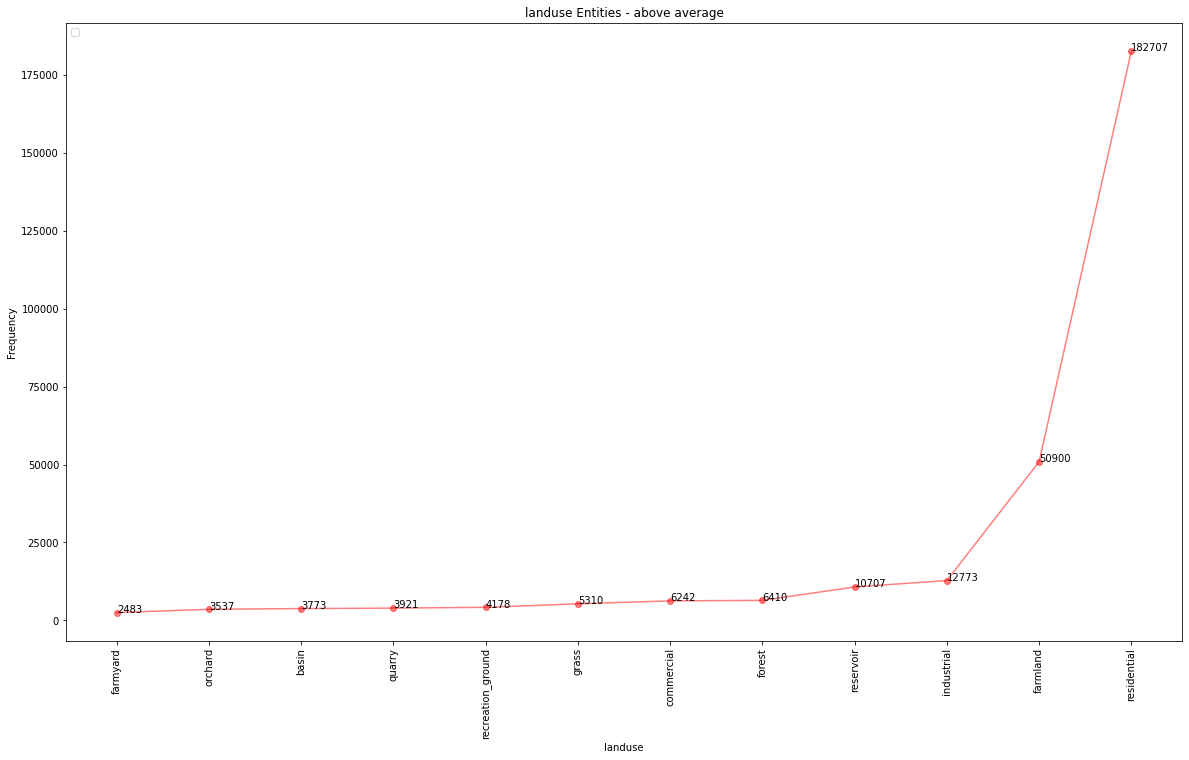

In [ ]:
fig = plt.figure(figsize = (20,25))
C = np.array([255, 0, 0])

ax2 = fig.add_subplot(211)
x = categories_upper.index
y = categories_upper.values
ax2.plot(x,y, marker='o', linestyle='-',  c = 'r', label='',alpha=0.5) 
ax2.set_xlabel('landuse')
ax2.set_ylabel('Frequency') 
plt.xticks(rotation=90)
ax2.set_title('landuse Entities - above average')
ax2.legend(loc = "upper left") 

for a,b in zip(x, y): 
    plt.text(a, b, str(b))

plt.savefig(loc,bbox_inches='tight', dpi=300)
plt.show()

### Tourism graph

In [ ]:
ad = pd.read_csv(tourism_loc)
loc = graphs_loc+'tourism-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,tourism,longitude-lattitude
29214,10653115,NaN,guest_house,NaN
29215,10795165,VNIT GIrls' Hostel,hostel,NaN
29216,11582351,SVITS Boys Hostel,hostel,NaN
29217,11602741,Girls Hostel,hostel,NaN
29218,11606803,Pillalamarri,attraction,NaN
29219,11648272,Hostel,hotel,NaN
29220,11739797,Trikon park,attraction,NaN
29221,11740098,NaN,hostel,NaN
29222,11769748,Kasu Brahmananda Reddy National Park,attraction,NaN
29223,11774595,Vinay Sadan,hostel,NaN


In [ ]:
categories = ad['tourism'].value_counts().sort_values()
categories

h                                                          1
51 Satipeeth                                               1
attraction_:_via_Kalladathanni_Vattathil_water_fall        1
village                                                    1
Yoga_Studio                                                1
club                                                       1
Place of worship/Dharamshala                               1
Shri Mahaveerji                                            1
cruises                                                    1
landmark                                                   1
holiday_camp                                               1
cave                                                       1
statue                                                     1
visitor_centre                                             1
service                                                    1
Radio Station, Sector 34-A                                 1
K S HEGDE MUSEUM        

In [ ]:
upper = [i for i in categories.values if i > categories.values.mean()]
upper_index = [categories.index[i] for i in range(len(categories)) if categories[i] > categories.values.mean()]
categories_upper =  pd.Series(upper,index=upper_index)
len(categories_upper)

10

No handles with labels found to put in legend.


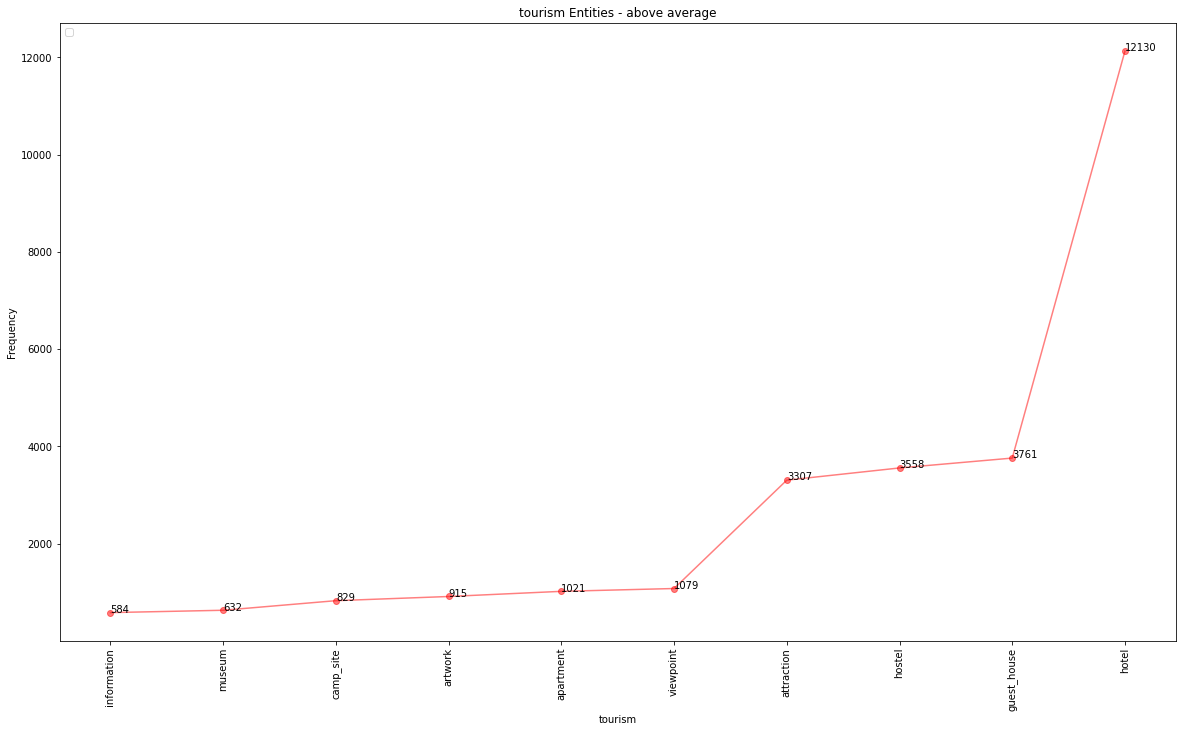

In [ ]:
fig = plt.figure(figsize = (20,25))
C = np.array([255, 0, 0])

ax2 = fig.add_subplot(211)
x = categories_upper.index
y = categories_upper.values
ax2.plot(x,y, marker='o', linestyle='-',  c = 'r', label='',alpha=0.5) 
ax2.set_xlabel('tourism')
ax2.set_ylabel('Frequency') 
plt.xticks(rotation=90)
ax2.set_title('tourism Entities - above average')
ax2.legend(loc = "upper left") 

for a,b in zip(x, y): 
    plt.text(a, b, str(b))

plt.savefig(loc,bbox_inches='tight', dpi=300)
plt.show()

### Boundary graph

In [ ]:
ad = pd.read_csv(boundary_loc)
loc = graphs_loc+'boundary-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,boundary,longitude-lattitude
29656,12038550,42,local_authority,NaN
29657,12038551,41,local_authority,NaN
29658,12038552,28,local_authority,NaN
29659,12038553,27,local_authority,NaN
29660,12038554,26,local_authority,NaN
29661,12038555,25,local_authority,NaN
29662,12038556,24,local_authority,NaN
29663,12038557,21,local_authority,NaN
29664,12038558,23,local_authority,NaN
29665,12038559,22,local_authority,NaN


In [ ]:
categories = ad['boundary'].value_counts().sort_values()
categories

conflict                             1
ceasefire                            1
residential                          1
Borgaon Zilla Parishad School        1
lot                                  1
art_&_Craft                          1
landuse                              1
*                                    1
natural                              1
region                               1
urban                                1
military                             1
College                              1
claimed_area                         1
legal                                1
demarcation_line                     1
historic                             1
religious_administration             2
boundary                             2
disputed_area                        3
marker                               3
maritime                             3
civil                                4
census                               4
town                                 5
special_economic_zone    

No handles with labels found to put in legend.


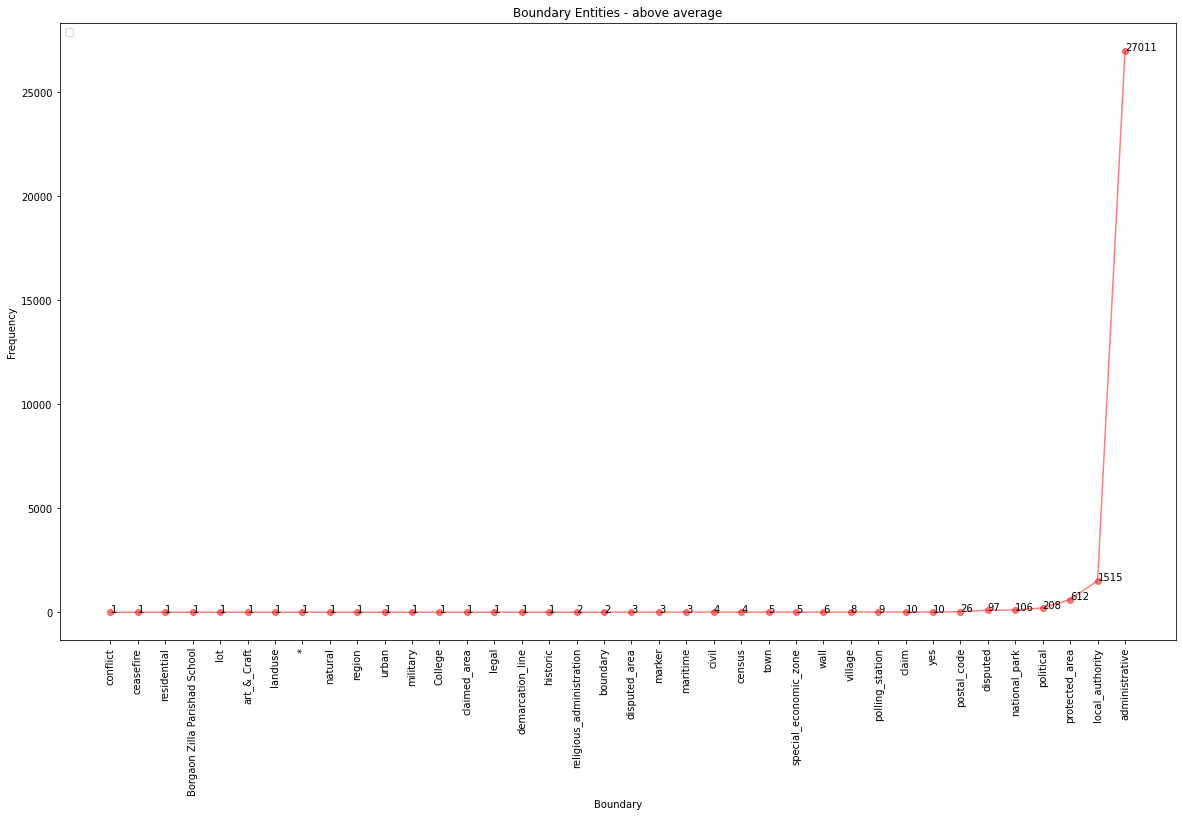

In [ ]:
fig = plt.figure(figsize = (20,25))
C = np.array([255, 0, 0])

ax2 = fig.add_subplot(211)
x = categories.index
y = categories.values
ax2.plot(x,y, marker='o', linestyle='-',  c = 'r', label='',alpha=0.5) 
ax2.set_xlabel('Boundary')
ax2.set_ylabel('Frequency') 
plt.xticks(rotation=90)
ax2.set_title('Boundary Entities - above average')
ax2.legend(loc = "upper left") 

for a,b in zip(x, y): 
    plt.text(a, b, str(b))

plt.savefig(loc,bbox_inches='tight', dpi=300)
plt.show()

## Graph Data as CSV
---
ATTENTION : Remember to give the path above for this to work or else it will give an error

### Building Dump CSV

In [ ]:
ad = pd.read_csv(building_loc)
loc = graphs_loc+'building-scatter.jpg'

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)

In [ ]:
ad.tail(10)

,Node id,name,building,longitude-lattitude
9994879,12077478,NaN,yes,NaN
9994880,12077479,NaN,yes,NaN
9994881,12077481,NaN,yes,NaN
9994882,12077977,NaN,yes,NaN
9994883,12077978,NaN,yes,NaN
9994884,12077979,NaN,yes,NaN
9994885,12078223,NaN,yes,NaN
9994886,12078224,NaN,yes,NaN
9994887,12078293,NaN,yes,NaN
9994888,12078528,NaN,yes,NaN


In [ ]:
categories = ad['building'].value_counts().sort_values()
categories.to_csv(graphs_loc+'building.csv',index=True)

### Advertising Dump CSV

In [ ]:
ad = pd.read_csv(advertising_loc)
loc = graphs_loc+'advertising-scatter.jpg'

In [ ]:
categories = ad['advertising'].value_counts()
categories.to_csv(graphs_loc+'advertising.csv',index=True)

### Leisure DUMP CSV

In [ ]:
ad = pd.read_csv(leisure_loc)
loc = graphs_loc+'leisure-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)

In [ ]:
ad.tail(10)

,Node id,name,leisure,longitude-lattitude
43545,11685785,NaN,track,NaN
43546,11705075,NaN,track,NaN
43547,11739797,Trikon park,park,NaN
43548,11760856,NaN,track,NaN
43549,11769748,Kasu Brahmananda Reddy National Park,nature_reserve,NaN
43550,12015991,NaN,track,NaN
43551,12015992,NaN,track,NaN
43552,12017087,NaN,track,NaN
43553,12017705,NaN,track,NaN
43554,12030651,Begumpet Hockey Astroturf Stadium,stadium,NaN


In [ ]:
categories = ad['leisure'].value_counts().sort_values()
categories.to_csv(graphs_loc+'leisure.csv',index=True)

### Amenity Dump CSV


In [ ]:
ad = pd.read_csv(amenity_loc)
loc = graphs_loc+'amenity-scatter.jpg'

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,amenity,longitude-lattitude
310757,11965593,Tata Institute of Fundamental Research (TIFR),college,NaN
310758,11965602,School of Life Sciences,college,NaN
310759,11984411,Kendriya Vidyalayam,school,NaN
310760,11997515,NaN,parking,NaN
310761,12016003,Akshaya e Kendra Vayalar,internet_cafe,NaN
310762,12022647,Sree Raja Rajeswari English Medium Schoolv Ground,school,NaN
310763,12022649,Higher Secondary School Kandamangalam,school,NaN
310764,12022780,NaN,parking,NaN
310765,12031603,LLRM Medical College,college,NaN
310766,12047020,NaN,bus_station,NaN


In [ ]:
categories = ad['amenity'].value_counts().sort_values()
categories.to_csv(graphs_loc+'amenity.csv',index=True)

### Office Dump CSV

In [ ]:
ad = pd.read_csv(office_loc)
loc = graphs_loc+'office-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,office,longitude-lattitude
17357,10601361,Brilliant Study Centre A-Block,educational_institution,NaN
17358,11072472,NaN,educational_institution,NaN
17359,11084375,infopark cherthala,it,NaN
17360,11146411,Institute of Management in Government,government,NaN
17361,11277763,gecw,yes,NaN
17362,11739992,Physics Department,educational_institution,NaN
17363,11774594,GITAM Institute of Management,educational_institution,NaN
17364,11795466,"O/o CE and ED, Palakkad Project Zone, CPWD",government,NaN
17365,11965593,Tata Institute of Fundamental Research (TIFR),research,NaN
17366,12022648,Sree Raja Rajeswari English Medium School Buil...,educational_institution,NaN


In [ ]:
categories = ad['office'].value_counts().sort_values()
categories.to_csv(graphs_loc+'office.csv',index=True)

### Man Made Dump CSV

In [ ]:
ad = pd.read_csv(man_made_loc)
loc = graphs_loc+'man_made-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,man_made,longitude-lattitude
42866,11081816,NaN,works,NaN
42867,11082137,NaN,works,NaN
42868,11109689,NaN,works,NaN
42869,11343028,NaN,courtyard,NaN
42870,11606008,NaN,pier,NaN
42871,11750925,NaN,courtyard,NaN
42872,11750926,NaN,courtyard,NaN
42873,11751104,NaN,courtyard,NaN
42874,11918823,NaN,pier,NaN
42875,11965361,Ram Jhula Bridge,bridge,NaN


In [ ]:
categories = ad['man_made'].value_counts().sort_values()
categories.to_csv(graphs_loc+'man_made.csv',index=True)

### Shop Dump CSV

In [ ]:
ad = pd.read_csv(shop_loc)
loc = graphs_loc+'shop-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,shop,longitude-lattitude
66776,7045338,Mulki Fish Market,seafood,NaN
66777,7547600,Chittilappilly Medical Store,medical_supply,NaN
66778,8726210,Downtown Mall,mall,NaN
66779,9636042,VR Bengaluru,mall,NaN
66780,10284079,Kohima Super Market,mall,NaN
66781,11071893,C.N store,plumbing,NaN
66782,11083764,Family Supermarket,supermarket,NaN
66783,11083765,NaN,supermarket,NaN
66784,11085987,Delma Centre,supermarket,NaN
66785,11109657,TC Silks,clothes,NaN


In [ ]:
categories = ad['shop'].value_counts().sort_values()
categories.to_csv(graphs_loc+'shop.csv',index=True)

### Craft Dump CSV

In [ ]:
ad = pd.read_csv(craft_loc)
loc = graphs_loc+'craft-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,craft,longitude-lattitude
1922,879560489,NST Garage,hvac,NaN
1923,880099941,NaN,sawmill,NaN
1924,881043999,NaN,sawmill,NaN
1925,881493914,NaN,caterer,NaN
1926,882220152,"KMP Saw Mill, Muvattupuzha",sawmill,NaN
1927,882221189,NaN,sawmill,NaN
1928,882223467,Cherkottu Saw Mill,sawmill,NaN
1929,882358977,NaN,pottery,NaN
1930,884053814,Three Star Sawmill,sawmill,NaN
1931,884258734,Flour Mill,grinding_mill,NaN


In [ ]:
categories = ad['craft'].value_counts().sort_values()
categories.to_csv(graphs_loc+'craft.csv',index=True)

### Historic Dump CSV

In [ ]:
ad = pd.read_csv(historic_loc)
loc = graphs_loc+'historic-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,historic,longitude-lattitude
5053,9976225,Lukshmi Villas Palace,castle,NaN
5054,10308869,Sisupalgarh Fort,fort,NaN
5055,10567786,Lohgad Fort,ruins,NaN
5056,10885025,Mandawa Castle,castle,NaN
5057,10910640,NaN,castle,NaN
5058,10928571,NaN,monument,NaN
5059,10928587,NaN,yes,NaN
5060,11300591,Kishangarh Fort,castle,NaN
5061,11337533,Gurramkonda Fort,fort,NaN
5062,11739451,Jain Temple,archaeological_site,NaN


In [ ]:
categories = ad['historic'].value_counts().sort_values()
categories.to_csv(graphs_loc+'historic.csv',index=True)

### Landuse Dump CSV

In [ ]:
ad = pd.read_csv(landuse_loc)
loc = graphs_loc+'landuse-scatter.jpg'

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,landuse,longitude-lattitude
304664,11965476,Food Corporation Of India,industrial,NaN
304665,11968939,NaN,farmland,NaN
304666,11977663,NaN,residential,NaN
304667,11977664,NaN,residential,NaN
304668,11977750,NaN,residential,NaN
304669,11977992,NaN,residential,NaN
304670,12013427,NaN,residential,NaN
304671,12017088,NaN,village_green,NaN
304672,12045851,NaN,residential,NaN
304673,12045852,NaN,farmland,NaN


In [ ]:
categories = ad['landuse'].value_counts().sort_values()
categories.to_csv(graphs_loc+'landuse.csv',index=True)

### Tourism Dump CSV

In [ ]:
ad = pd.read_csv(tourism_loc)
loc = graphs_loc+'tourism-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,tourism,longitude-lattitude
29214,10653115,NaN,guest_house,NaN
29215,10795165,VNIT GIrls' Hostel,hostel,NaN
29216,11582351,SVITS Boys Hostel,hostel,NaN
29217,11602741,Girls Hostel,hostel,NaN
29218,11606803,Pillalamarri,attraction,NaN
29219,11648272,Hostel,hotel,NaN
29220,11739797,Trikon park,attraction,NaN
29221,11740098,NaN,hostel,NaN
29222,11769748,Kasu Brahmananda Reddy National Park,attraction,NaN
29223,11774595,Vinay Sadan,hostel,NaN


In [ ]:
categories = ad['tourism'].value_counts().sort_values()
categories.to_csv(graphs_loc+'tourism.csv',index=True)

### Boundary Dump CSV

In [ ]:
ad = pd.read_csv(boundary_loc)
loc = graphs_loc+'boundary-scatter.jpg'

In [ ]:
ad.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)


In [ ]:
ad.tail(10)

,Node id,name,boundary,longitude-lattitude
29656,12038550,42,local_authority,NaN
29657,12038551,41,local_authority,NaN
29658,12038552,28,local_authority,NaN
29659,12038553,27,local_authority,NaN
29660,12038554,26,local_authority,NaN
29661,12038555,25,local_authority,NaN
29662,12038556,24,local_authority,NaN
29663,12038557,21,local_authority,NaN
29664,12038558,23,local_authority,NaN
29665,12038559,22,local_authority,NaN


In [ ]:
categories = ad['boundary'].value_counts().sort_values()
categories.to_csv(graphs_loc+'boundary.csv',index=True)

# DATA ANALYSIS

## New Sub-Category Analysis

### Eval Functions

In [ ]:
def Detect_Changes(paths):
  category = ['building','leisure','amenity','office','man_made','advertising','shop','craft','historic','landuse','tourism','boundary']
  # category = ['building']#,'leisure','amenity','office','man_made','advertising','shop','craft','historic','landuse','tourism','boundary'] 

  type_lst_prev = []
  types = []
  new_types = []
  changes_df = pd.DataFrame(columns=['Category','New_Types_Added'])

  for i in category:
    c=0
    type_lst_prev = []
    for j in paths:
      if c>0:
        df = pd.read_csv(j+i+'.csv')
        df.rename(columns = {'Unnamed: 0':'type'}, inplace = True)
        df.sort_values(by=['type'],inplace = True)
        types = df['type'].values
        
        for k in types:
          if str(k) not in type_lst_prev[0]:
            new_types.append(k)

        type_lst_prev = type_lst_prev #+ new_types

      else:
        df = pd.read_csv(j+i+'.csv')
        df.rename(columns = {'Unnamed: 0':'type'}, inplace = True)
        df.sort_values(by=['type'],inplace = True)
        type_lst_prev.append(df['type'].values)     
      c+=1
      if c==len(paths):
        changes_df = changes_df.append({'Category':i,'New_Types_Added':", ".join(new_types)},ignore_index=True)
      
      new_types = []
        
  #print(changes_df.head(12))
  return changes_df

In [ ]:
def get_all_folder_paths(path):
  for base, dirs, files in os.walk(path):
    paths = [path+d+'/Data Graphs CSV/' for d in dirs if re.match(r'\d{4}-\d{2}-\d{2}',str(d))]
    return paths

### Automated for all Dates

In [ ]:
#To detect changes overall (Automated)

path = '/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/'
analyzed_path =  '/content/drive/Shareddrives/Doc_monster7/Analyzed Data/'
# GIVE FILE NAME
file_name_to_store_changes_in = '23-12-2020'

paths = get_all_folder_paths(path)

result_df = Detect_Changes(paths)
result_df.to_csv(analyzed_path + file_name_to_store_changes_in + '.csv', index=True)
result_df.head(12)

,Category,New_Types_Added
0,building,abandoned
1,leisure,
2,amenity,
3,office,
4,man_made,
5,advertising,
6,shop,
7,craft,
8,historic,
9,landuse,


### From and To Date Eval

In [ ]:
# To get changes from date to date
# IMPORTANT NOTE : DATE FORMAT SHOULD BE IN 'yyyy-mm-dd'

from_date = '2020-12-21'
to_date= '2020-12-22'
file_name_to_store_changes_in = from_date+'_to_'+to_date

path = '/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/'
analyzed_path =  '/content/drive/Shareddrives/Doc_monster7/Analyzed Data/'

paths = get_all_folder_paths(path)

try:
  paths_subset = paths[paths.index(path + from_date + '/Data Graphs CSV/') : paths.index(path + to_date + '/Data Graphs CSV/') + 1]
  result_df = Detect_Changes(paths_subset)
  result_df.to_csv(analyzed_path + file_name_to_store_changes_in + '.csv', index=True)
  print(result_df.head(12))
except:
  print('Invalid input/No File found')

       Category New_Types_Added
0      building       abandoned
1       leisure                
2       amenity                
3        office                
4      man_made                
5   advertising                
6          shop                
7         craft                
8      historic                
9       landuse                
10      tourism                
11     boundary                


## Comparision Graphs of different days


### Automated Graph Generator

In [ ]:
def merge_category(df1,df2,x_label):
  categories_1 = pd.Series(df1[x_label].values,index=df1['Node id'])

  upper = [i for i in categories_1.values if i > categories_1.values.mean()]
  upper_index = [categories_1.index[i] for i in range(len(categories_1)) if categories_1[i] > categories_1.values.mean()]
  categories_upper_1 =  pd.DataFrame(pd.Series(upper,index=upper_index))
  #categories_upper_1

  categories_2 =  pd.Series(df2[x_label].values,index=df2['Node id'])

  upper = [i for i in categories_2.values if i > categories_2.values.mean()]
  upper_index = [categories_2.index[i] for i in range(len(categories_2)) if categories_2[i] > categories_2.values.mean()]
  categories_upper_2 =  pd.DataFrame(pd.Series(upper,index=upper_index))

  final_df = categories_upper_1.merge(categories_upper_2,how='inner', left_index=True , right_index=True).sort_values('0_x')
  return final_df


In [ ]:
def merge_category_top_10(df1,df2,x_label):
  categories_1 = pd.Series(df1[x_label].values,index=df1['Node id'])

  upper = [i for i in categories_1.values]
  upper_index = [categories_1.index[i] for i in range(len(categories_1))]
  categories_upper_1 =  pd.DataFrame(pd.Series(upper,index=upper_index))
  #categories_upper_1

  categories_2 =  pd.Series(df2[x_label].values,index=df2['Node id'])

  upper = [i for i in categories_2.values]
  upper_index = [categories_2.index[i] for i in range(len(categories_2))]
  categories_upper_2 =  pd.DataFrame(pd.Series(upper,index=upper_index))

  final_df = categories_upper_1.merge(categories_upper_2,how='inner', left_index=True , right_index=True).sort_values('0_x')
  return final_df.tail(10)

In [ ]:
def merge_category_bottom_10(df1,df2,x_label):
  categories_1 = pd.Series(df1[x_label].values,index=df1['Node id'])

  upper = [i for i in categories_1.values]
  upper_index = [categories_1.index[i] for i in range(len(categories_1))]
  categories_upper_1 =  pd.DataFrame(pd.Series(upper,index=upper_index))
  #categories_upper_1

  categories_2 =  pd.Series(df2[x_label].values,index=df2['Node id'])

  upper = [i for i in categories_2.values]
  upper_index = [categories_2.index[i] for i in range(len(categories_2))]
  categories_upper_2 =  pd.DataFrame(pd.Series(upper,index=upper_index))

  final_df = categories_upper_1.merge(categories_upper_2,how='inner', left_index=True , right_index=True).sort_values('0_x')
  return final_df.head(10)

In [ ]:
def visualize_mesmarise(loc,final_df,x_label,date_1,date_2):
  x = final_df.index
  y1 = final_df['0_x'].values
  y2 = final_df['0_y'].values
  x_ = np.arange(len(x))

  fig = plt.figure(figsize = (30, 15))
  ax1 = fig.add_subplot()
  width = 0.4


  a1 = ax1.bar(x_ - width/2 , y1,width, label=date_1,color='orange')
  a2 = ax1.bar(x_ + width/2, y2,width, label=date_2,color='purple')

  ax1.set_xlabel(x_label)
  ax1.set_ylabel('Frequency') 
  ax1.set_title(x_label+' Frequency Above Average')
  ax1.set_xticks(x_)
  ax1.set_xticklabels(x,rotation=90)
  ax1.legend(loc = "upper left") 

  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          # Annotate function adds text at position x,y
          ax1.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0,5),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center',rotation=90)

  autolabel(a1)
  autolabel(a2)
  plt.savefig(loc,bbox_inches='tight', dpi=300)

  plt.show()

### User Defined Comparision of Upper Limits



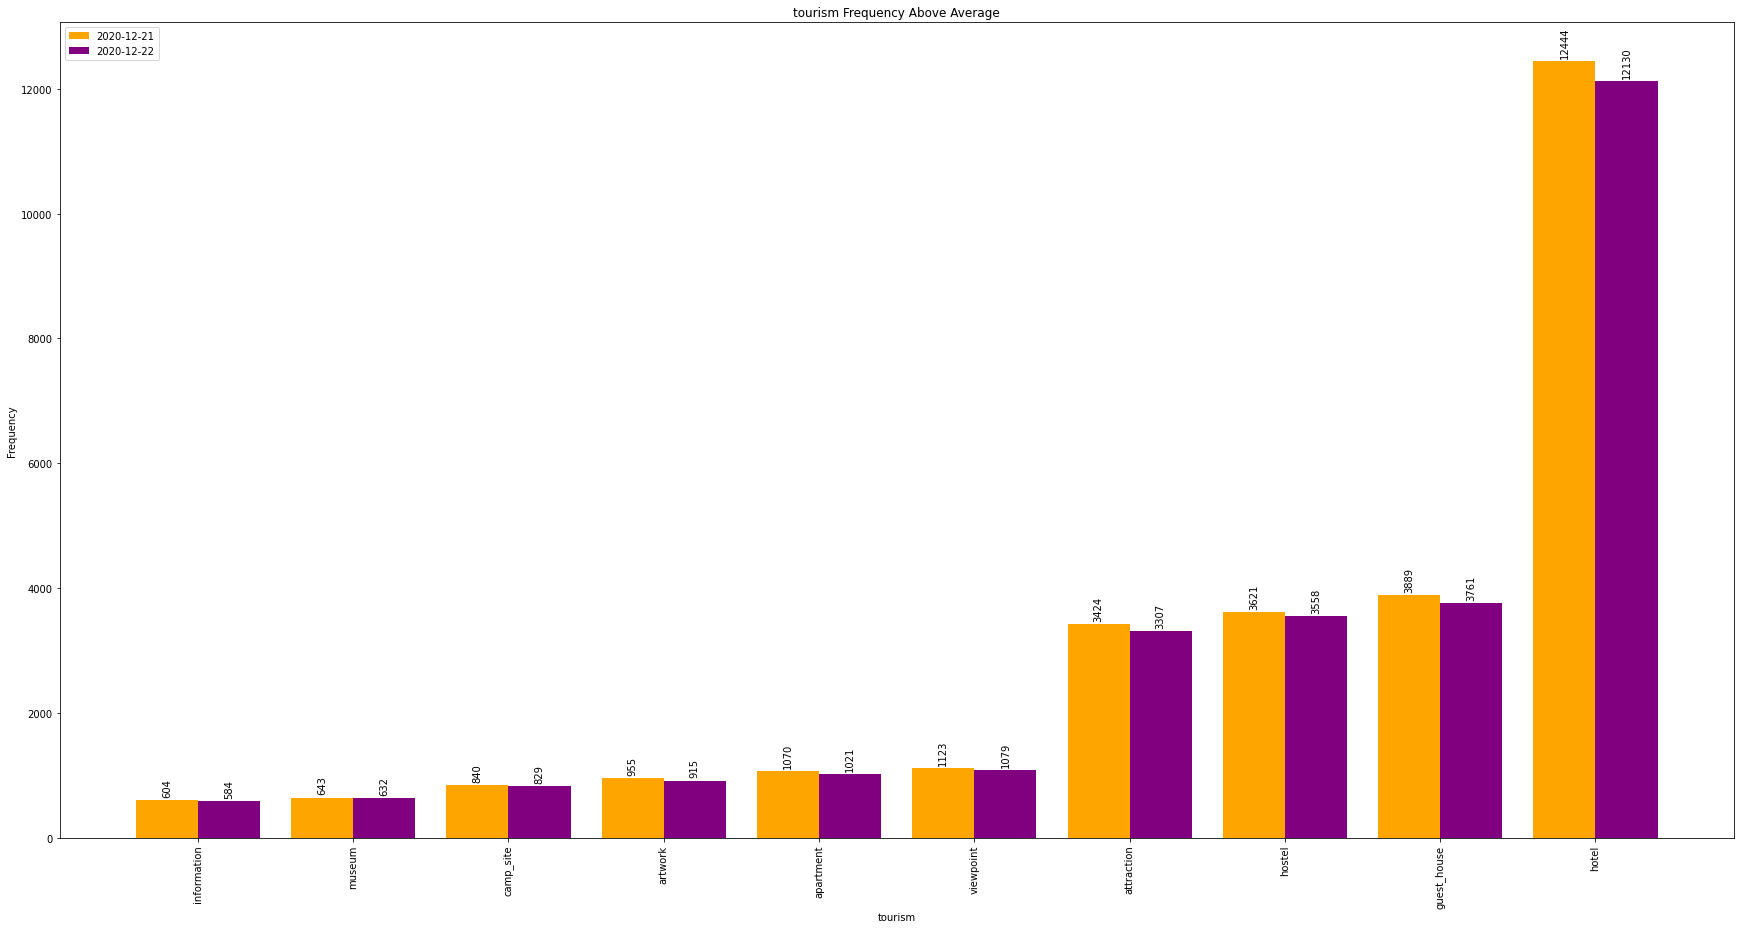

In [ ]:
x_label = 'tourism'
# Dates in yyyy-mm-dd
date_1 = '2020-12-21'
date_2 = '2020-12-22'

df1 = pd.read_csv('/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/'+date_1+'/Data Graphs CSV/'+x_label+'.csv')
df2 = pd.read_csv('/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/'+date_2+'/Data Graphs CSV/'+x_label+'.csv')
loc = '/content/drive/Shareddrives/Doc_monster7/Analyzed Data/Graphs'+'/'+x_label+"_"+date_1+"_"+"_"+date_2
df1.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)
df2.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)
final_df = merge_category(df1,df2,x_label)
visualize_mesmarise(loc,final_df,x_label,date_1,date_2)




### Top Ten Sub-Categories


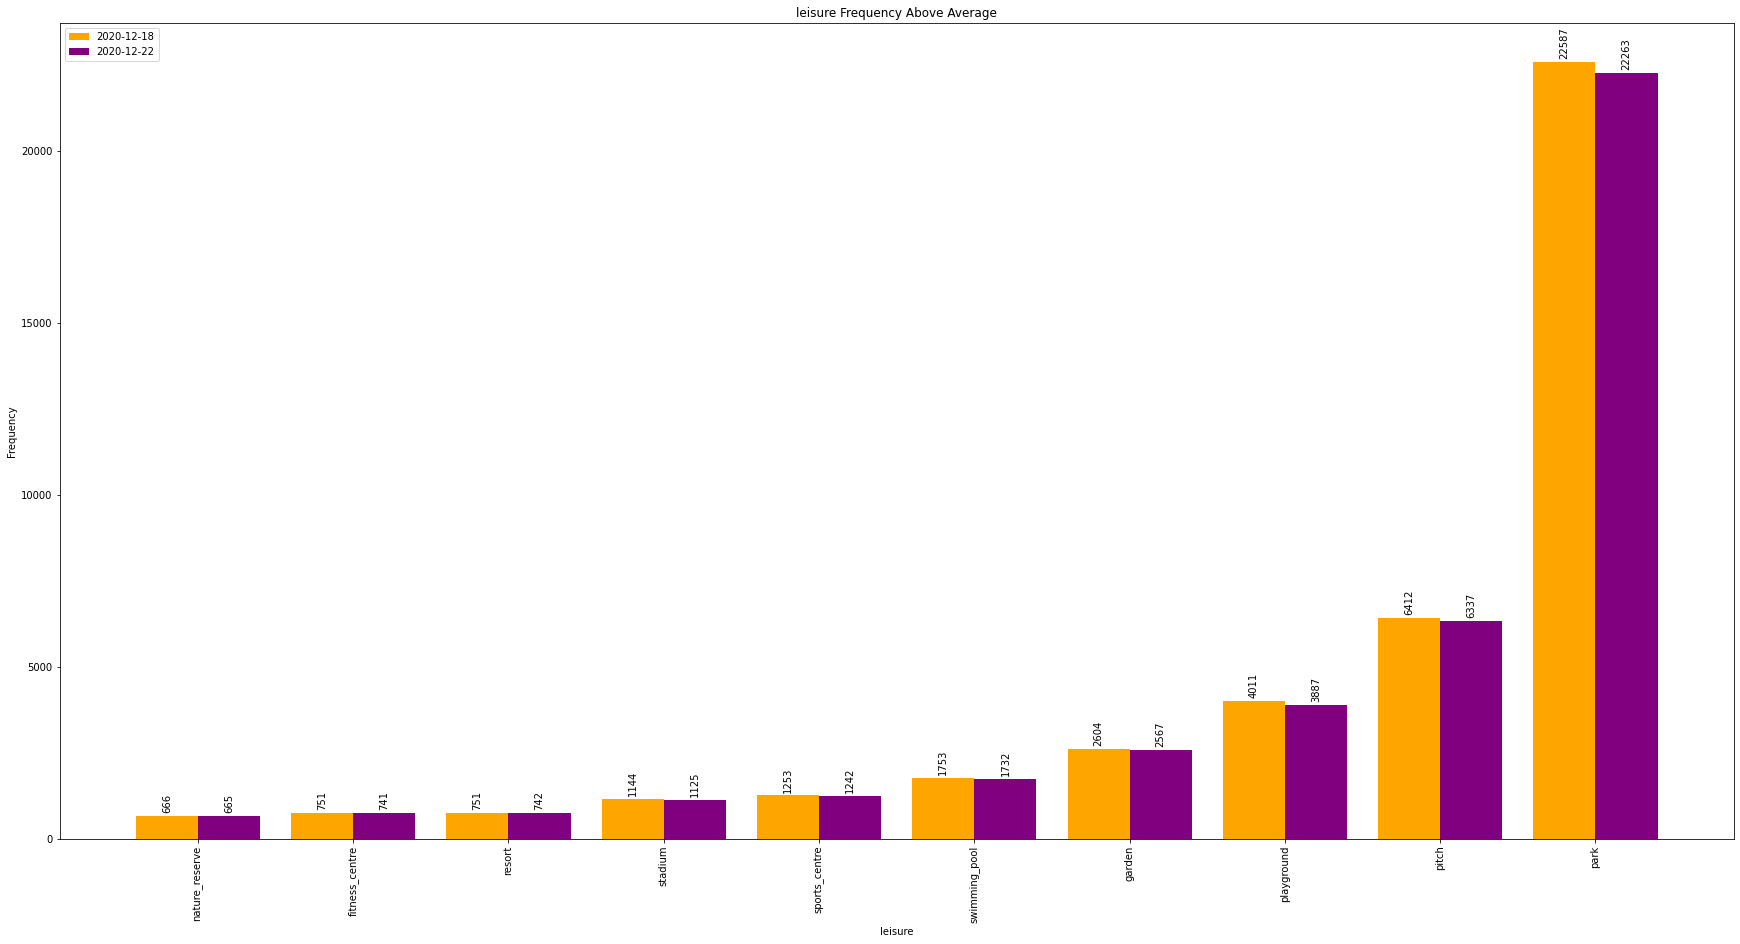

In [ ]:
x_label = 'leisure'
# Dates in yyyy-mm-dd
date_1 = '2020-12-18'
date_2 = '2020-12-22'



df1 = pd.read_csv('/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/'+date_1+'/Data Graphs CSV/'+x_label+'.csv')
df2 = pd.read_csv('/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/'+date_2+'/Data Graphs CSV/'+x_label+'.csv')
loc = '/content/drive/Shareddrives/Doc_monster7/Analyzed Data/Graphs'+'/'+x_label+"_"+date_1+"_"+"_"+date_2+'_top'

df1.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)
df2.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)

final_df = merge_category_top_10(df1,df2,x_label)
visualize_mesmarise(loc,final_df,x_label,date_1,date_2)



### Bottom Ten Sub-Categories

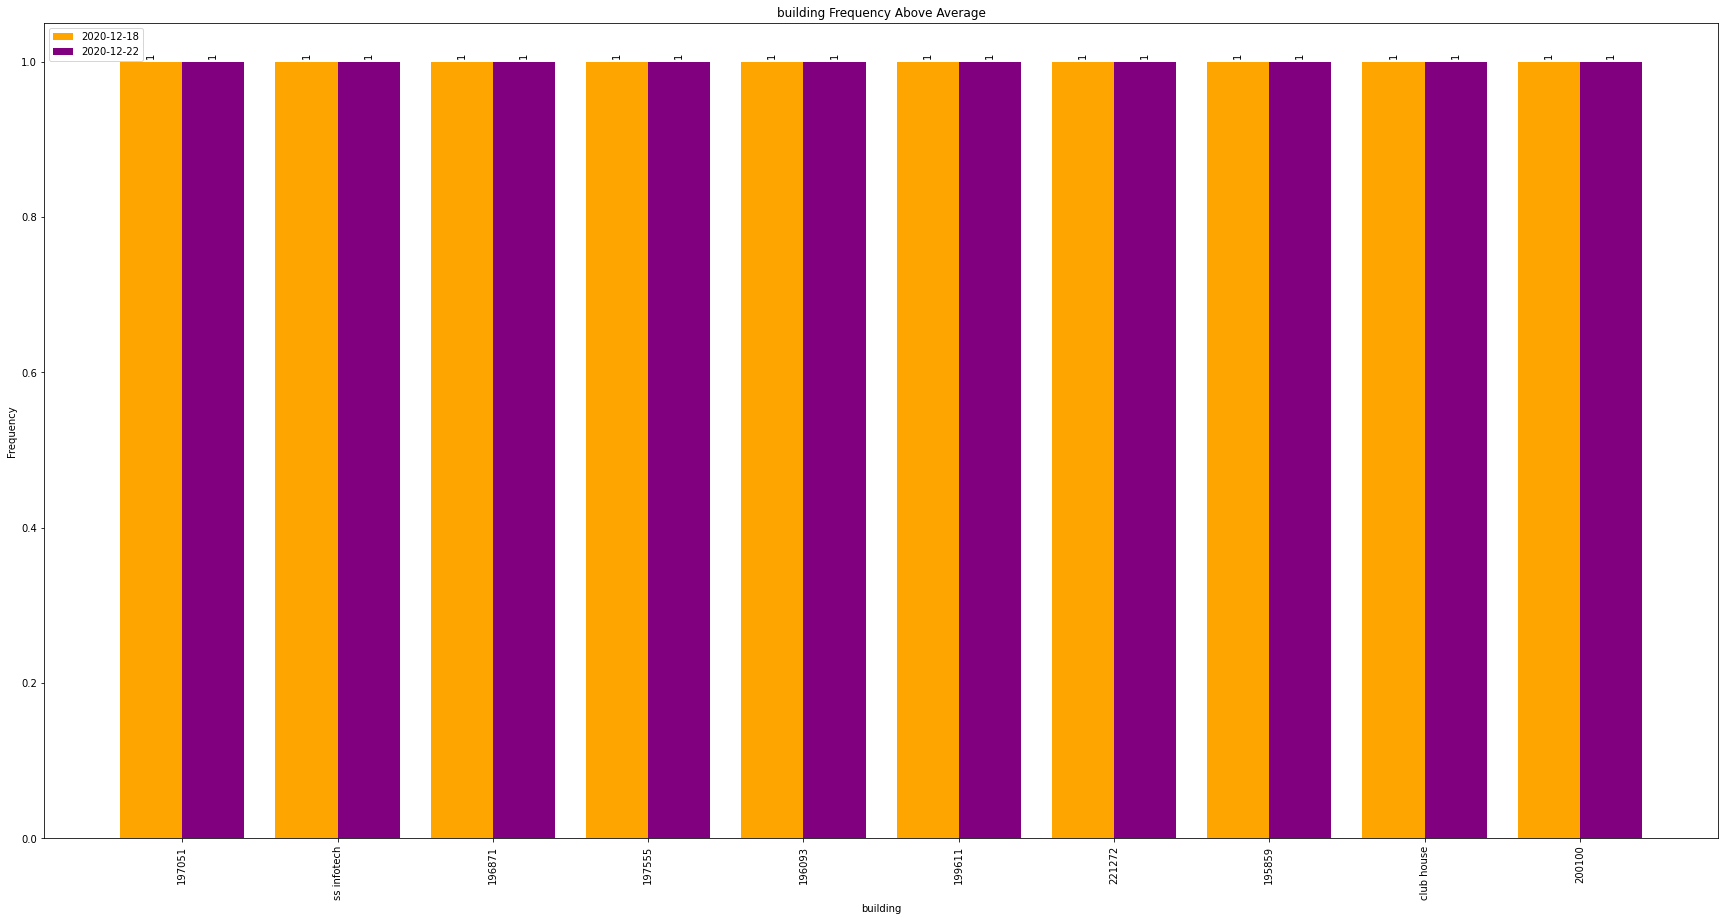

In [ ]:
x_label = 'building'
# Dates in yyyy-mm-dd
date_1 = '2020-12-18'
date_2 = '2020-12-22'



df1 = pd.read_csv('/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/'+date_1+'/Data Graphs CSV/'+x_label+'.csv')
df2 = pd.read_csv('/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/'+date_2+'/Data Graphs CSV/'+x_label+'.csv')
loc = '/content/drive/Shareddrives/Doc_monster7/Analyzed Data/Graphs'+'/'+x_label+"_"+date_1+"_"+"_"+date_2+'_bottom'

df1.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)
df2.rename(columns = {'Unnamed: 0':'Node id'}, inplace = True)

final_df = merge_category_bottom_10(df1,df2,x_label)
visualize_mesmarise(loc,final_df,x_label,date_1,date_2)



# DO NOT EDIT SECTION / BACKUP



## ANALYZATION PART

* ratio of hospitals in cities vs rural areas
*  altitude to determine temperature
* 

In [ ]:
api = osmapi.OsmApi()
details = api.NodeGet(293675097)
print(details)

{'id': 293675097, 'visible': True, 'version': 2, 'changeset': 528582, 'timestamp': datetime.datetime(2008, 9, 4, 19, 19, 56), 'user': 'dockers', 'uid': 35009, 'lat': 11.67851, 'lon': 92.71485, 'tag': {'leisure': 'marina', 'name': 'NSRY Jetty'}}


In [ ]:
import os

analyzed_path =  '/content/drive/Shareddrives/Doc_monster7/Analyzed Data/'
path = '/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/'
starting_date = '2020-12-18'

for base, dirs, files in os.walk(APP_FOLDER):
  Dir = [path+d+'/' for d in dirs if re.match(r'\d{4}-\d{2}-\d{2}',str(d))]
  break

Dir

In [ ]:
analyzed_path =  '/content/drive/Shareddrives/Doc_monster7/Analyzed Data/'
path = '/content/drive/Shareddrives/Doc_monster7/DATA DUMP csv/'

for base, dirs, files in os.walk(path):
  paths = [path+d+'/Data Graphs CSV/' for d in dirs if re.match(r'\d{4}-\d{2}-\d{2}',str(d))]
  break

# yyyy-mm-dd
category = ['building','leisure','amenity','office','man_made','advertising','shop','craft','historic','landuse','tourism','boundary']
# category = ['building']#,'leisure','amenity','office','man_made','advertising','shop','craft','historic','landuse','tourism','boundary'] 

type_lst_prev = []
types = []
new_types = []
changes_df = pd.DataFrame(columns=['category','new types added'])

for i in category:
  c=0
  type_lst_prev = []
  for j in paths:
    if c>0:
      df = pd.read_csv(j+i+'.csv')
      df.rename(columns = {'Unnamed: 0':'type'}, inplace = True)
      df.sort_values(by=['type'],inplace = True)
      types = df['type'].values
      
      for k in types:
        if str(k) not in type_lst_prev[0]:
          new_types.append(k)

      type_lst_prev = type_lst_prev #+ new_types

    else:
      df = pd.read_csv(j+i+'.csv')
      df.rename(columns = {'Unnamed: 0':'type'}, inplace = True)
      df.sort_values(by=['type'],inplace = True)
      type_lst_prev.append(df['type'].values)     
    c+=1
    if c==len(paths):
      changes_df = changes_df.append({'category':i,'new types added':",".join(new_types)},ignore_index=True)
    
    new_types = []
      
print(changes_df.head())
changes_df.to_csv(analyzed_path+datetime.today().strftime("%c")+'changesDetected_Master.csv',index=True)

In [ ]:

#  OK TESTED 

# building = [entry for entry in osm if entry.tags.get('building')]   
# leisure = [entry for entry in osm if entry.tags.get('leisure')]   
# amenity = [entry for entry in osm if entry.tags.get('amenity')]   
# office = [entry for entry in osm if entry.tags.get('office')]   
# man_made = [entry for entry in osm if entry.tags.get('man_made')]   
# advertising = [entry for entry in osm if entry.tags.get('advertising')]   
# shop = [entry for entry in osm if entry.tags.get('shop')]   
# craft = [entry for entry in osm if entry.tags.get('craft')]   
# historic = [entry for entry in osm if entry.tags.get('historic')]   
# landuse = [entry for entry in osm if entry.tags.get('landuse')]   
# tourism = [entry for entry in osm if entry.tags.get('tourism')]   
# boundary = [entry for entry in osm if entry.tags.get('boundary')]   



#  Rewrite the code for this

# highway = [entry for entry in osm if entry.tags.get('highway')]   
# traffic_calming = [entry for entry in osm if entry.tags.get('traffic_calming')]   
# junction = [entry for entry in osm if entry.tags.get('junction')]  
# addr_housenumber = [entry for entry in osm if entry.tags.get('addr:housenumber')]  





# NOT WORKING FOR SOME REASON




#  TBD


 
 
# addr_housename = [entry for entry in osm if entry.tags.get('addr:housename')]   
# addr_flats = [entry for entry in osm if entry.tags.get('addr:flats')]   
# addr_conscriptionnumber = [entry for entry in osm if entry.tags.get('addr:conscriptionnumber')]   
# addr_street = [entry for entry in osm if entry.tags.get('addr:street')]   
# addr_place = [entry for entry in osm if entry.tags.get('addr:place')]   
# addr_postcode = [entry for entry in osm if entry.tags.get('addr:postcode')]   
# addr_city = [entry for entry in osm if entry.tags.get('addr:city')]   
# addr_country = [entry for entry in osm if entry.tags.get('addr:country')]   
# addr_full = [entry for entry in osm if entry.tags.get('addr:full')]   
# addr_hamlet = [entry for entry in osm if entry.tags.get('addr:hamlet')]   
# addr_suburb = [entry for entry in osm if entry.tags.get('addr:suburb')]   
# addr_subdistrict = [entry for entry in osm if entry.tags.get('addr:subdistrict')]   
# addr_district = [entry for entry in osm if entry.tags.get('addr:district')]   
# addr_province = [entry for entry in osm if entry.tags.get('addr:province')]   
# addr_state = [entry for entry in osm if entry.tags.get('addr:state')]   
# addr_interpolation = [entry for entry in osm if entry.tags.get('addr:interpolation')]   
# addr_interpolation = [entry for entry in osm if entry.tags.get('addr:interpolation')]   
# addr_inclusion = [entry for entry in osm if entry.tags.get('addr:inclusion')]   



In [ ]:
#  Main Code DO NOT EDIT THIS MAKE A COPY AND EDIT THAT

place_holder_tag = <Enter the tag here>
place_holder_tag_name = get_variable_name(<Enter the tage here>)

series_ = pd.Series(place_holder_tag)
place_holder_tags = []
names = []
node_ids = []
lonlat = []

for i in series_:

  try:
    if 'name' in i.tags and place_holder_tag_name in i.tags and i.lonlat:
      lonlat.append(i.lonlat)
      node_ids.append(i.id)
      place_holder_tags.append(i.tags[place_holder_tag_name])
      names.append(i.tags['name'])
    else:
      continue
    
  except:
      continue

    

df= pd.DataFrame({'name':names,place_holder_tag_name:place_holder_tags, 'longitude-lattitude': lonlat}, index = node_ids)


In [ ]:
for i in range(len(ad['name'].values)):
  if str(ad['name'][i]) == 'NaN':
    ad['name'][i] = np.nan


In [ ]:
for i in range(len(ad['longitude-lattitude'].values)):
  if str(ad['longitude-lattitude'][i]) == 'no_name' or str(ad['longitude-lattitude'][i]) == 'no_lonlat':
    ad['longitude-lattitude'][i] = np.nan

### Finding length


In [ ]:
# all the tags will have its respective lengths infront of it for FYI during analysis

# Tested 

# len(building )  # 11880215
# len(leisure )  # 44081
# len(amenity )  # 315956
# len(office )  # 18170
# len(man_made )  # 43954
# len(shop )  # 68475
# len(advertising )  # 28
# len(craft )  # 1978
# len(historic )  # 5173
# len(landuse )  # 338692
# len(tourism )  # 30044
# len(boundary )  # 32413
# len(highway )  # 4430260
# len(traffic_calming )  # 2248
# len(junction )  # 8426
# len(addr_housenumber )  # 61858

# TBD



# len(addr_housename )  # TBD
# len(addr_flats )  # TBD
# len(addr_conscriptionnumber )  # TBD
# len(addr_street )  # TBD
# len(addr_place )  # TBD
# len(addr_postcode )  # TBD
# len(addr_city )  # TBD
# len(addr_country )  # TBD
# len(addr_full )  # TBD
# len(addr_hamlet )  # TBD
# len(addr_suburb )  # TBD
# len(addr_subdistrict )  # TBD
# len(addr_district )  # TBD
# len(addr_province )  # TBD
# len(addr_state )  # TBD
# len(addr_interpolation )  # TBD
# len(addr_interpolation )  # TBD
# len(addr_inclusion )  # TBD


61858

### Getting proper filtered values with all entries

In [ ]:
# Code for Editing 
# Replace place_holder_tag and palce_holder_tag_name with whatever tag you are working with


place_holder_tag = advertising
place_holder_tag_name = get_variable_name(advertising)

series_ = pd.Series(place_holder_tag)
place_holder_tags = []
names = []
node_ids = []
lonlat = []

for i in series_:

  try:
    if 'name' in i.tags and place_holder_tag_name in i.tags and i.lonlat:
      lonlat.append(i.lonlat)
      node_ids.append(i.id)
      place_holder_tags.append(i.tags[place_holder_tag_name])
      names.append(i.tags['name'])
    else:
      continue
    
  except:
      continue

    

df= pd.DataFrame({'name':names,place_holder_tag_name:place_holder_tags, 'longitude-lattitude': lonlat}, index = node_ids)


In [ ]:
df.shape

(0, 3)

In [ ]:
df.head(10)

,name,junction,longitude-lattitude
15382331,Chalakudy North Junction,yes,"(76.33849100000005, 10.307961299999999)"
15382371,Anamala Junction,yes,"(76.33701660000003, 10.311032199999998)"
16208593,Clock Tower,yes,"(76.6561451999999, 12.309891299999983)"
16988614,Ollur Junction,yes,"(76.24070979999989, 10.474701699999976)"
16988644,Peringavu cheroor juction,yes,"(76.2211628999999, 10.543903699999978)"
30143748,Viliyanur Junction,yes,"(79.75701719999974, 11.919064899999984)"
30156230,Factory Padi Junction,yes,"(76.97769589999984, 9.566333099999978)"
30167764,Collectorate Junction,yes,"(76.53234879999992, 9.589777799999979)"
60952254,Prof Ashirvadam Junction,yes,"(77.60476440000001, 12.970884000000002)"
60952260,Shoolay Circle,yes,"(77.6067163, 12.966260400000001)"


In [ ]:
file_name = datetime.datetime.now().strftime("%c")+'_'+place_holder_tag_name+'.csv'
print(file_name)
df.to_csv(file_name, index=True)

Sat Dec 19 10:23:59 2020_junction.csv


In [ ]:
for i in category:
  df_master = []
  df_prev = pd.DataFrame()
  for j in paths:
    df = pd.read_csv(j+i+'.csv')
    df_prev = df
    df.rename(columns = {'Unnamed: 0':'type'}, inplace = True)
    # print(df.head(10))
    df_master.append(df)
    for i in 
  
  # print(df_master[1]['type'])
  types = []
  for i in range(len(df_master)):
    types.append([df_master[i]['type'].unique()])

  print(types)
  break

In [ ]:
#For Testing purpose 

location = geolocator.reverse(' 26.909257900000014,70.92158620000022')

geolocator = Nominatim(user_agent="geoapiExercises")
print(location.raw['address']['state'])
address = pd.Series(location.raw['address'])
# try:
#   print('village : ',address['village'])
# except:
#   try:
#     print(address['suburb'])
#   except:
#     try:
#       print(address['city'])
#     except:
#       print("neh")

#df['District'] = [get_district(str(i).strip("()")) for i in df['longitude-lattitude']]
village,suburb,city,town,county = np.nan, np.nan, np.nan,np.nan,np.nan

if 'village' in address.index:
  print('village : ',address['village'])
  village = address['village']
if 'suburb' in address.index:
  print(address['suburb'])
  suburb = address['suburb']
if 'city' in address.index:
  print(address['city'])
  city = address['city']
if 'town' in address.index:
  town = address['town']
if 'county' in address.index:
  county = address['county']


places = [village,suburb,city,town,county]
places

Rajasthan


[nan, nan, nan, 'Jaisalmer', 'Jaisalmer Tehsil']